![example](images/house_for_sale.png)

# Phase 2 Project

**Author:** Freddy Abrahamson<br>
**Date created:** 12-29-2021<br>
**Discipline:** Data Science

## Overview
For this project, I will use multiple linear regression modeling to analyze house sales in King County, in Washington state.

## Business Problem

The goal of this project is to to provide advice to homeowners about how home renovations can increase the value of their homes, and by what amount. The information for this project is derived from information comprised of the different characteristics of over 20,000 homes in King County,which is located in Washington State. I will use this information gain a better understanding about how different remodels, or renovations to the homes listed, impact their price. 

## Data Understanding

Describe the data being used for this project.
***
The data comes from the King County House Sales dataset, in the form of a 'csv' file. The file will be converted into a pandas dataframe. It contains information about the different characteristics of the homes in the King County area,including the number of bedrooms, building grades, square footage, and price. King County is located in Washington State, and has a size of approximately 2300 square miles, per the U.S Census Bureau:

kc_house_data.csv


I will be giving this dataframe a brief overview of its different characteristics, with a view toward using its columns as variables in a regression model. These include:

* dataframe shape: the number of rows and columns in the dataframe
* any missing/null values
* continuous variables
* categorical variables
* binary variables
* zero inflated variables
* outliers

Since the goal is to try to gain insights, as to how much much a particular upgrade or remodel can the impact the
price of the house, as opposed to predicting home prices, I will be placing an emphasis on choosing features with the least explanatory overlap. To that end, for instance, I would favor a feature such as a bedroom, or a bathroom over square footage.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
%matplotlib inline

In [2]:
#Importing dataframe
df = pd.read_csv('data/kc_house_data.csv')
df = df.sort_values(by=['price'])

<font size="3"><b>I will use the following visualizations, and set of descriptive statistics, to familiarize myself:
with the data.</b></font>

In [3]:
#Dropping the 'id' column from the dataframe since it is of no use in the regression model
kc_df = df.drop('id',axis=1).copy()
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 15279 to 7245
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqf

In [4]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


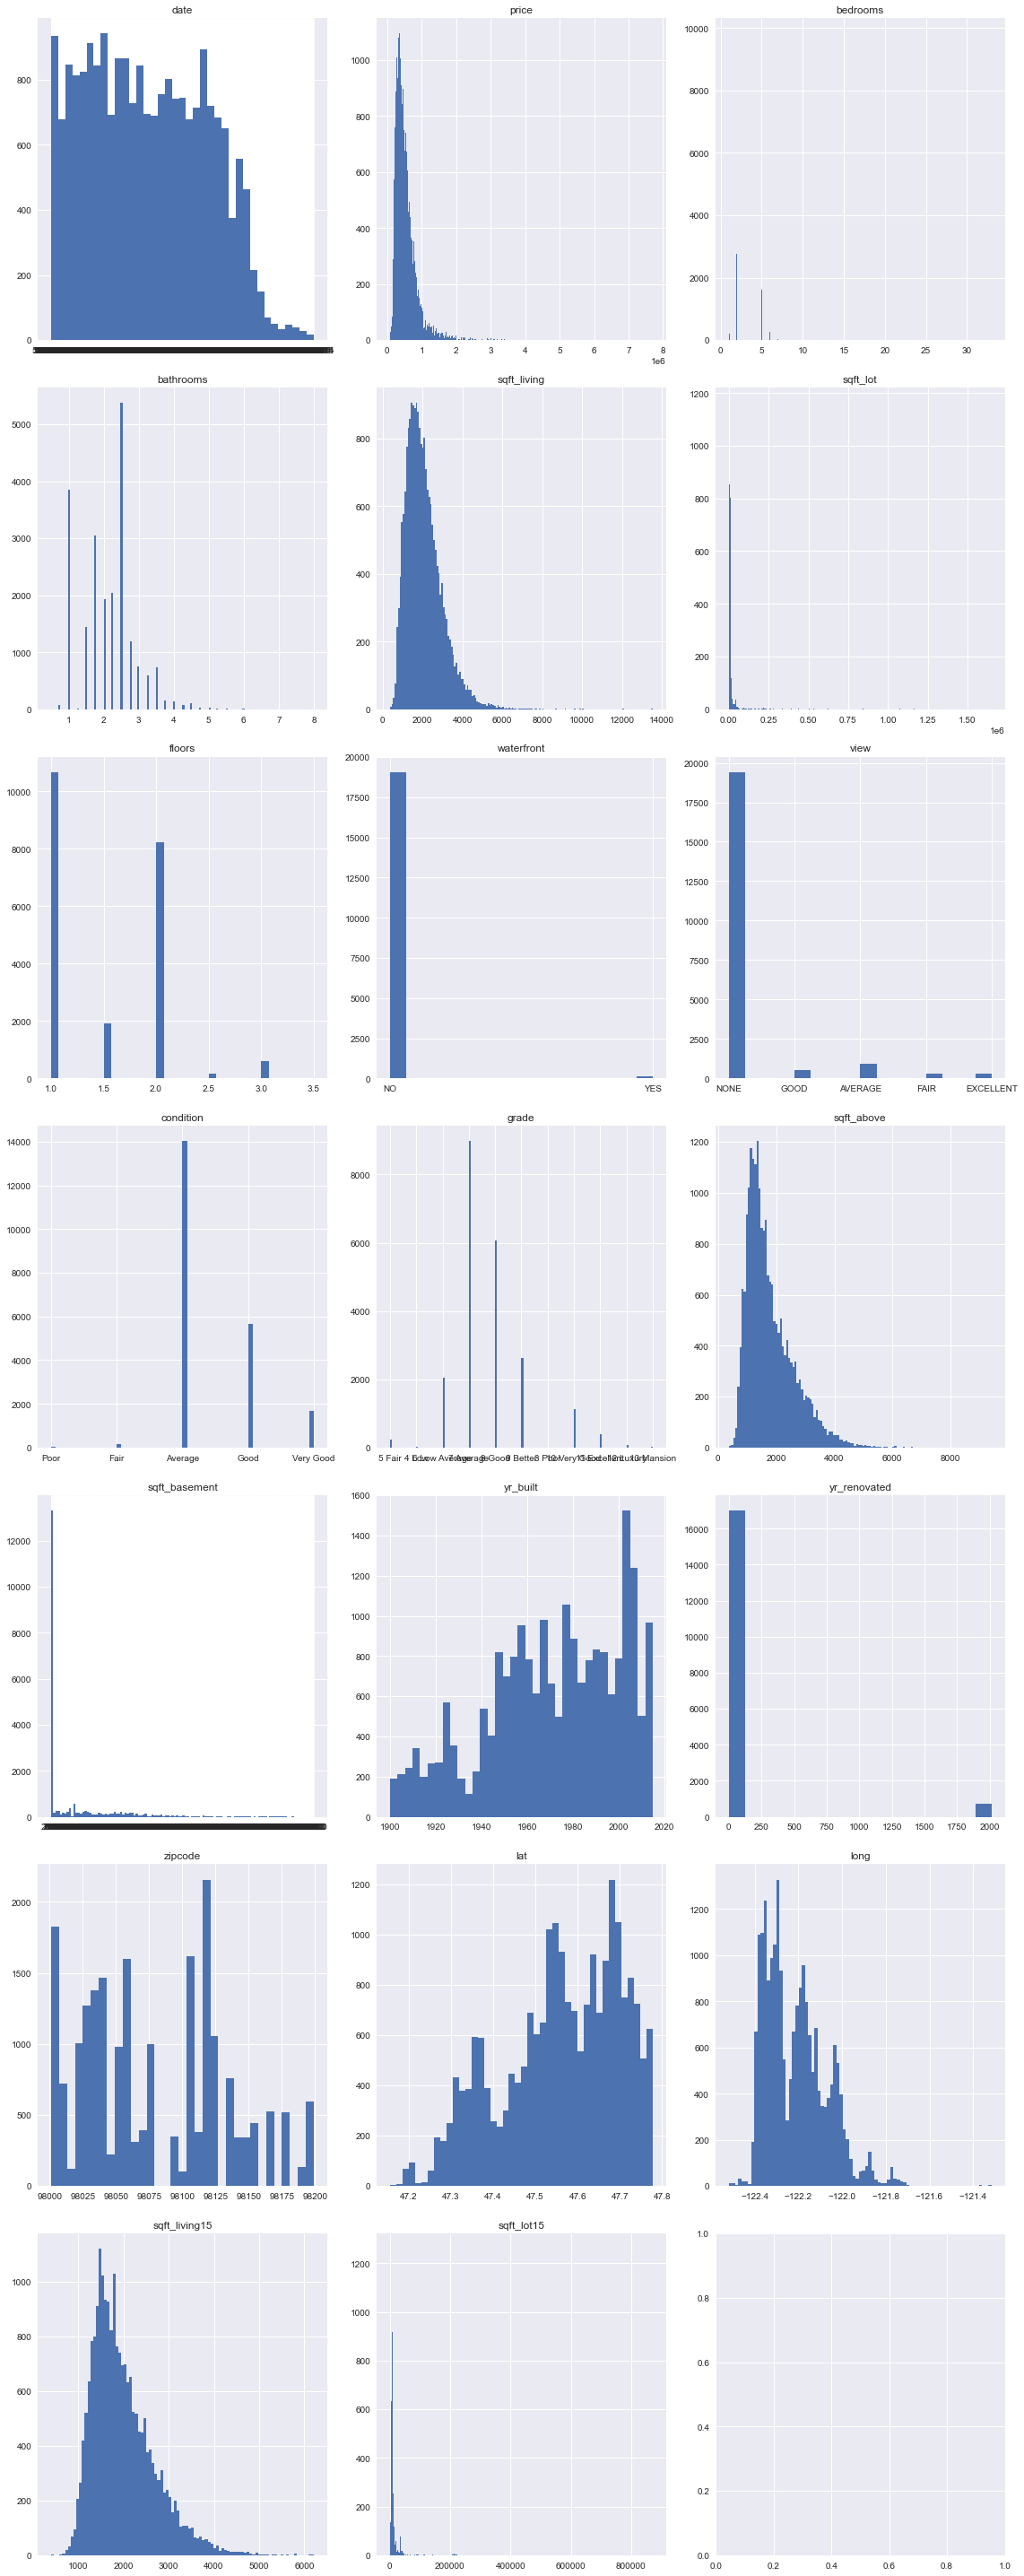

In [5]:
#Creating a histogram of each column of the dataframe to visually inspect each feature:

fig, axes = plt.subplots(nrows=(7), ncols=3, figsize=(16,40))
kc_df_cols = kc_df.columns

for col, ax in zip(kc_df_cols, axes.flatten()):
    ax.hist(kc_df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

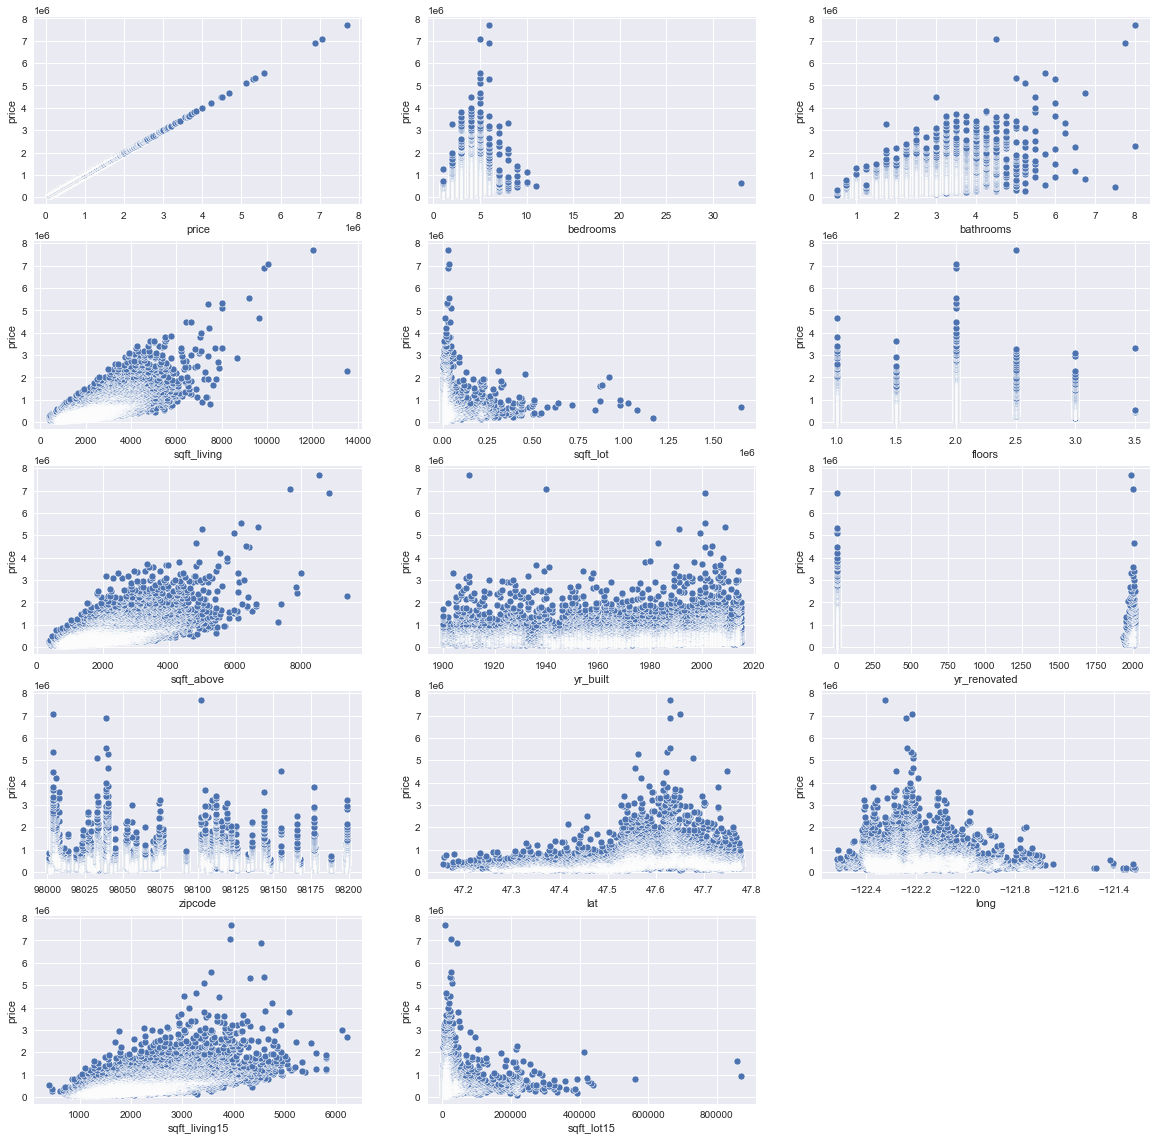

In [6]:
df_nums_non_null_only = kc_df.iloc[:,np.r_[1:6,6,11,13:19,19]]
df_nums_non_null_only_cols_list = list(df_nums_non_null_only.columns)

count=1
plt.subplots(figsize=(20, 20))
for i in df_nums_non_null_only.columns:
    plt.subplot(5,3,count)
    sns.scatterplot(df_nums_non_null_only[i],df_nums_non_null_only["price"])
    count+=1

plt.show()

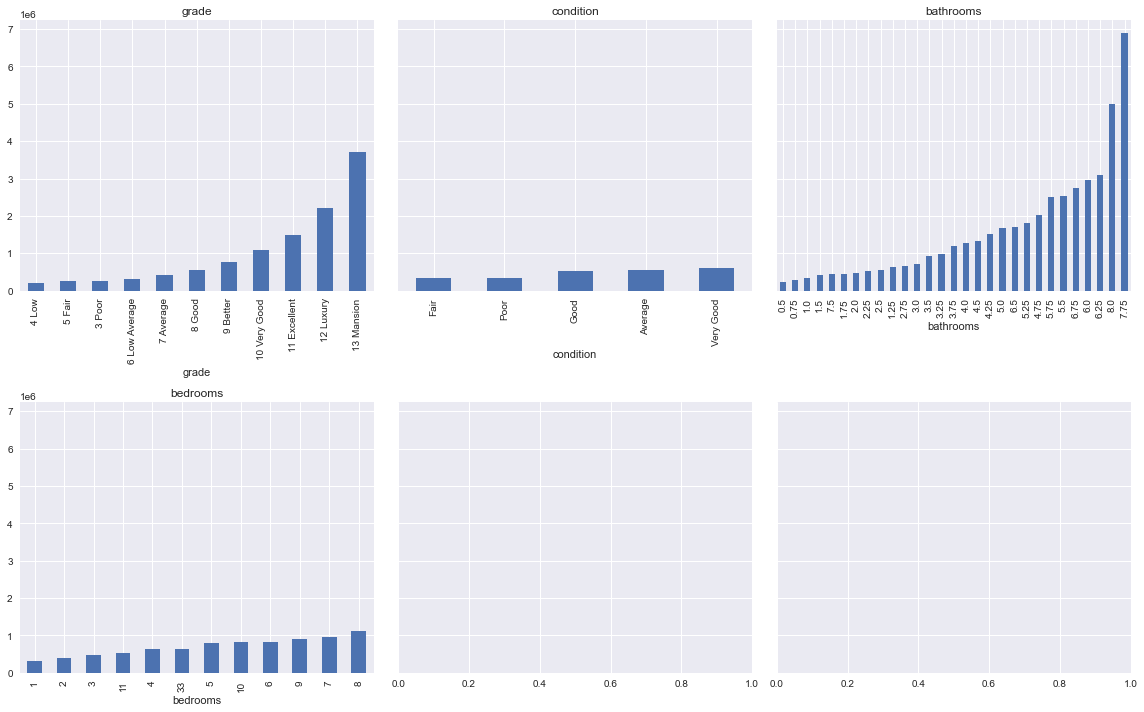

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['grade', 'condition','bathrooms','bedrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

### Data Understanding Take-aways So Far:
1. There appear to be six categorical variables: 
 - bedrooms 
 - bathrooms
 - floors
 - view
 - condition
 - grade
<BR><BR>
2. There is atleast one binary variable:
 - waterfront
<BR><BR>    
3. There appear to be several potential zero inflated variables:
 - sqft_lot
 - sqft_basement
 - yr_renovated
 - sqft_lot15
<BR><BR>
4. There are also several right-skewed distributions, that may be normalized by a log transformation 
5. Sqft_living appears to have the strongest correlation with price. Sqft_above and bathrooms, also 
    appear to have a pretty strong linear relationship with price.
    
6.  Since the relationship between the ordinal variables (grade,condition, bathrooms,bedrooms) are not repectively         monotonic, some of the results given by the regression model may appear non-sensical.

7. The descriptive analysis, as well as the visualizations show that there are outliers. I will 
    begin by removing these. 

## Removing Outliers 

In [8]:
#Log transforming the price may help in more closely approximating a normal distribution of the residuals.
kc_df['price'] = kc_df['price'].apply(lambda x: np.log(x))

In [9]:
#Using the Z-score to drop any 'price' values that are more than 3 standard deviations away from the mean.
#Code taken from geeksforgeeks website:

# Z score 
z = np.abs(stats.zscore(kc_df['price']))

In [10]:
print("Old Shape: ", kc_df.shape) 

# Position of the outlier
drop_list = (np.where(z > 3))

''' Removing the Outliers '''
kc_df.drop(drop_list[0], inplace = True)


print("New Shape: ", kc_df.shape)

Old Shape:  (21597, 20)
New Shape:  (21428, 20)


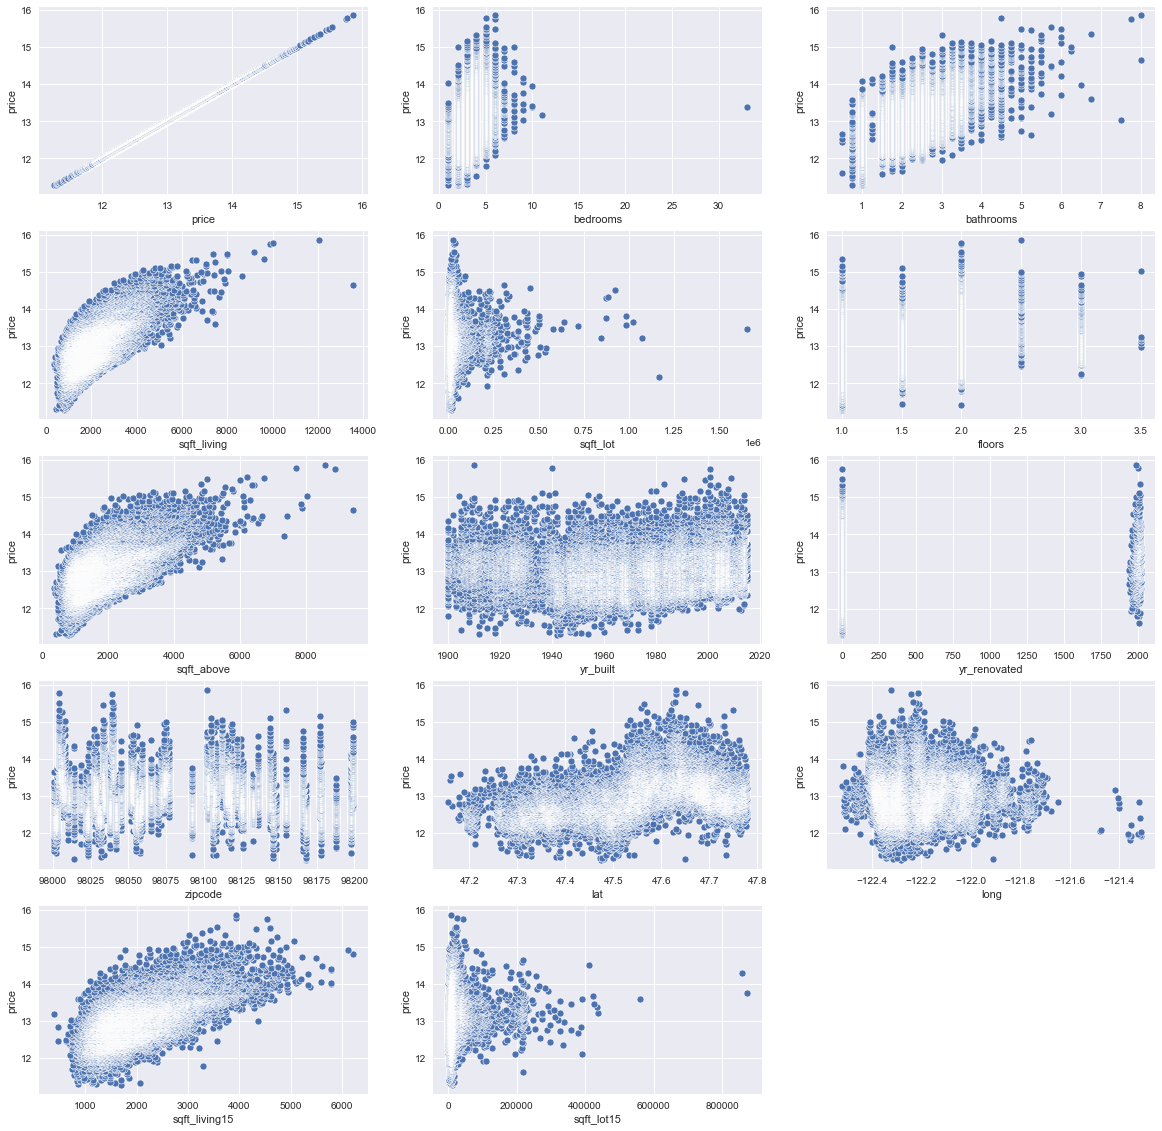

In [11]:
#Reviewing the scatter plots after the outliers are dropped

df_nums_non_null_only = kc_df.iloc[:,np.r_[1:6,6,11,13:19,19]]
df_nums_non_null_only_cols_list = list(df_nums_non_null_only.columns)

count=1
plt.subplots(figsize=(20, 20))
for i in df_nums_non_null_only.columns:
    plt.subplot(5,3,count)
    sns.scatterplot(df_nums_non_null_only[i],df_nums_non_null_only["price"])
    count+=1

plt.show()

## Split The Data

In [12]:
X_data = kc_df.drop('price',axis=1)
y_data = kc_df['price']

# Preprocessing Data

<font size="2"><b>In this section, I will deal with incorrect data types, as well as  missing , or 'zero-inflated' data. I will also create the categorical 'dummy' columns , as well as perform transformations on continuous data if necessary.</b></font>

In [13]:
kc_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,5/6/2014,11.264464,2,1.00,780,16344,1.0,NO,NONE,Poor,5 Fair,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,5/23/2014,11.289782,1,0.75,430,5050,1.0,NaN,NONE,Fair,4 Low,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3/24/2015,11.302204,2,1.00,730,9975,1.0,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,11/5/2014,11.314475,3,1.00,860,10426,1.0,NO,NONE,Average,6 Low Average,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,5/8/2014,11.320554,2,1.00,520,22334,1.0,NO,NONE,Fair,5 Fair,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570


In [14]:
#Reviewing the features' correlations with price and each other:
X_data_corr_matrix = pd.concat([y_data,X_data],axis=1)
X_data_corr_matrix.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.342175,0.549168,0.693735,0.099157,0.311952,0.599718,0.076975,0.119082,-0.036906,0.450110,0.048611,0.619426,0.090826
bedrooms,0.342175,1.000000,0.514700,0.577473,0.032125,0.180880,0.477602,0.156323,0.018673,-0.152642,-0.009336,0.130780,0.392061,0.030159
bathrooms,0.549168,0.514700,1.000000,0.755681,0.088137,0.503727,0.685987,0.505396,0.052167,-0.205006,0.023668,0.224962,0.570978,0.087817
sqft_living,0.693735,0.577473,0.755681,1.000000,0.172687,0.358523,0.875408,0.317881,0.056261,-0.197497,0.052610,0.238609,0.756331,0.183113
sqft_lot,0.099157,0.032125,0.088137,0.172687,1.000000,-0.003162,0.183642,0.054381,0.004389,-0.129125,-0.085677,0.229329,0.143494,0.717557
floors,0.311952,0.180880,0.503727,0.358523,-0.003162,1.000000,0.529531,0.484957,0.004740,-0.062490,0.047639,0.130157,0.285011,-0.009015
sqft_above,0.599718,0.477602,0.685987,0.875408,0.183642,0.529531,1.000000,0.424076,0.022725,-0.259739,-0.000769,0.343060,0.731558,0.194073
yr_built,0.076975,0.156323,0.505396,0.317881,0.054381,0.484957,0.424076,1.000000,-0.224921,-0.351013,-0.149923,0.414347,0.327623,0.072238
yr_renovated,0.119082,0.018673,0.052167,0.056261,0.004389,0.004740,0.022725,-0.224921,1.000000,0.069953,0.031898,-0.072398,0.000253,0.003778
zipcode,-0.036906,-0.152642,-0.205006,-0.197497,-0.129125,-0.062490,-0.259739,-0.351013,0.069953,1.000000,0.266419,-0.563945,-0.277298,-0.146825


In [15]:
# 'sqft_living' is the feature most highly correlated with 'price'. I will create a baseline model with that
#single feature. Although I do not plan to use it, it is important to have it as a reference:
baseline  = X_data['sqft_living']

In [16]:
#This model shows that 'sqft_living alone explains almost 48% of the variance in price.
import statsmodels.api as sm
baseline_df = sm.add_constant(baseline)
baseline_model = sm.OLS(y_data,baseline_df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.988e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:33   Log-Likelihood:                -9607.2
No. Observations:               21428   AIC:                         1.922e+04
Df Residuals:                   21426   BIC:                         1.923e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2182      0.006   1902.668      0.000      12.206      12.231
sqft_living     0.0004   2.83e-06    140.991      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.602   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.622
Skew:                           0.028   Prob(JB):                        0.163
Kurtosis:                       2.971   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dealing with NaN(s) and/or Dropping Columns 

In [17]:
# I will drop the date column, since there is a supposition that all the prices are based on the present time:

X_data.drop('date',axis=1,inplace=True)

In [18]:
#Reviewing columns with missing data
yr_renovated_not_null = X_data['yr_renovated'].notnull().sum()
yr_renovated_null = len(X_data.loc[X_data['yr_renovated']==0])

missing_data = [x for x in X_data.columns if X_data[x].notnull().sum()!=21428]
for col in missing_data:
    percent_missing = 1-X_data[col].notnull().sum()/21428
    print("The percentage of data missing in the",col, "column is:",percent_missing)
print('The number of X_data.yr_renovated values equal to 0:',len(X_data.loc[X_data['yr_renovated']==0]))
print('The percentage of the [yr_renovated] non-missing values not equal to 0:',
       (yr_renovated_not_null - yr_renovated_null)/yr_renovated_not_null)



The percentage of data missing in the waterfront column is: 0.11004293447825275
The percentage of data missing in the view column is: 0.0028467425798021084
The percentage of data missing in the yr_renovated column is: 0.17761806981519512
The number of X_data.yr_renovated values equal to 0: 16879
The percentage of the [yr_renovated] non-missing values not equal to 0: 0.0421632050845534


In [19]:
#I will drop the "yr_renovated" column since:
# 1.the percentage of missing data is approaching 20%
# 2.even within the 80% of non-null data, 96% is 0

#for the other two columns, I will replace the missing values with a string called 'missing':

X_data.drop('yr_renovated',axis=1,inplace=True)
X_data["waterfront"].fillna("missing", inplace = True)
X_data["view"].fillna("missing", inplace = True)

In [20]:
#The dataframe has no missing values:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21428 non-null  int64  
 1   bathrooms      21428 non-null  float64
 2   sqft_living    21428 non-null  int64  
 3   sqft_lot       21428 non-null  int64  
 4   floors         21428 non-null  float64
 5   waterfront     21428 non-null  object 
 6   view           21428 non-null  object 
 7   condition      21428 non-null  object 
 8   grade          21428 non-null  object 
 9   sqft_above     21428 non-null  int64  
 10  sqft_basement  21428 non-null  object 
 11  yr_built       21428 non-null  int64  
 12  zipcode        21428 non-null  int64  
 13  lat            21428 non-null  float64
 14  long           21428 non-null  float64
 15  sqft_living15  21428 non-null  int64  
 16  sqft_lot15     21428 non-null  int64  
dtypes: float64(4), int64(8), object(5)
memory usage

In [21]:
#I will create a new dataframe to differentiate between one with, and without categorical variables
X_data_w_cat = X_data.copy()

## Creating Categorical Variables

In [22]:
# 1. I will apply one-hot encoding to the following features:
#    view
#    condition
#    grade
#    bedrooms
#    bathrooms
#    floors

# 2. I will do the same with the 'waterfront' since it now is split ino three categories

#creating the new dataframes with the dummy columns:
view_dummies = pd.get_dummies(X_data['view'], prefix='view', drop_first=True)
conditon_dummies = pd.get_dummies(X_data['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(X_data['grade'], prefix='grd', drop_first=True)
waterfront_dummies = pd.get_dummies(X_data['waterfront'], prefix='wtrfrnt', drop_first=True)
bedroom_dummies = pd.get_dummies(X_data['bedrooms'], prefix='bdrm_', drop_first=True)
bathroom_dummies = pd.get_dummies(X_data['bathrooms'], prefix='bthrm_', drop_first=True)
floor_dummies = pd.get_dummies(X_data['floors'], prefix='flr_', drop_first=True)


#dropping the columns containing the categorical data from 'X_data' dataframe:
X_data_only_cont = X_data.drop(['view','condition','grade','waterfront','bedrooms',
                                'bathrooms','floors'], axis=1)

#concatenating one-hot dataframes with 'X_data' dataframe:
X_data_w_cat = pd.concat([X_data_only_cont,view_dummies,conditon_dummies,grade_dummies,waterfront_dummies,
                          bedroom_dummies,bathroom_dummies,floor_dummies], axis=1)

X_data_w_cat.describe()

,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,view_EXCELLENT,...,bthrm__6.5,bthrm__6.75,bthrm__7.5,bthrm__7.75,bthrm__8.0,flr__1.5,flr__2.0,flr__2.5,flr__3.0,flr__3.5
count,21428.000000,2.142800e+04,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,...,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000
mean,2077.922718,1.513879e+04,1785.662918,1970.752147,98077.929438,47.560031,-122.213879,1985.363730,12782.252380,0.014700,...,0.000047,0.000093,0.000047,0.000047,0.000093,0.088949,0.378850,0.007467,0.027254,0.000327
std,915.165858,4.152263e+04,824.815870,29.299933,53.539263,0.138733,0.140687,683.013935,27322.785367,0.120354,...,0.006831,0.009661,0.006831,0.006831,0.009661,0.284677,0.485112,0.086090,0.162827,0.018072
min,370.000000,5.200000e+02,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1429.250000,5.065000e+03,1190.000000,1951.000000,98033.000000,47.470200,-122.328000,1490.000000,5100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1910.000000,7.621500e+03,1560.000000,1974.000000,98065.000000,47.571800,-122.230000,1840.000000,7627.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2550.000000,1.072000e+04,2210.000000,1996.000000,98118.000000,47.678200,-122.125000,2360.000000,10092.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,13540.000000,1.651359e+06,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Given that 'sqft_basement' has missing data, and the vast majority of the data is zero, I will drop it.

X_data_w_cat.drop(['sqft_basement'],axis=1, inplace=True)
X_data_w_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sqft_living        21428 non-null  int64  
 1   sqft_lot           21428 non-null  int64  
 2   sqft_above         21428 non-null  int64  
 3   yr_built           21428 non-null  int64  
 4   zipcode            21428 non-null  int64  
 5   lat                21428 non-null  float64
 6   long               21428 non-null  float64
 7   sqft_living15      21428 non-null  int64  
 8   sqft_lot15         21428 non-null  int64  
 9   view_EXCELLENT     21428 non-null  uint8  
 10  view_FAIR          21428 non-null  uint8  
 11  view_GOOD          21428 non-null  uint8  
 12  view_NONE          21428 non-null  uint8  
 13  view_missing       21428 non-null  uint8  
 14  cond_Fair          21428 non-null  uint8  
 15  cond_Good          21428 non-null  uint8  
 16  cond_Poor          

## Log Transforming the Continuous Features

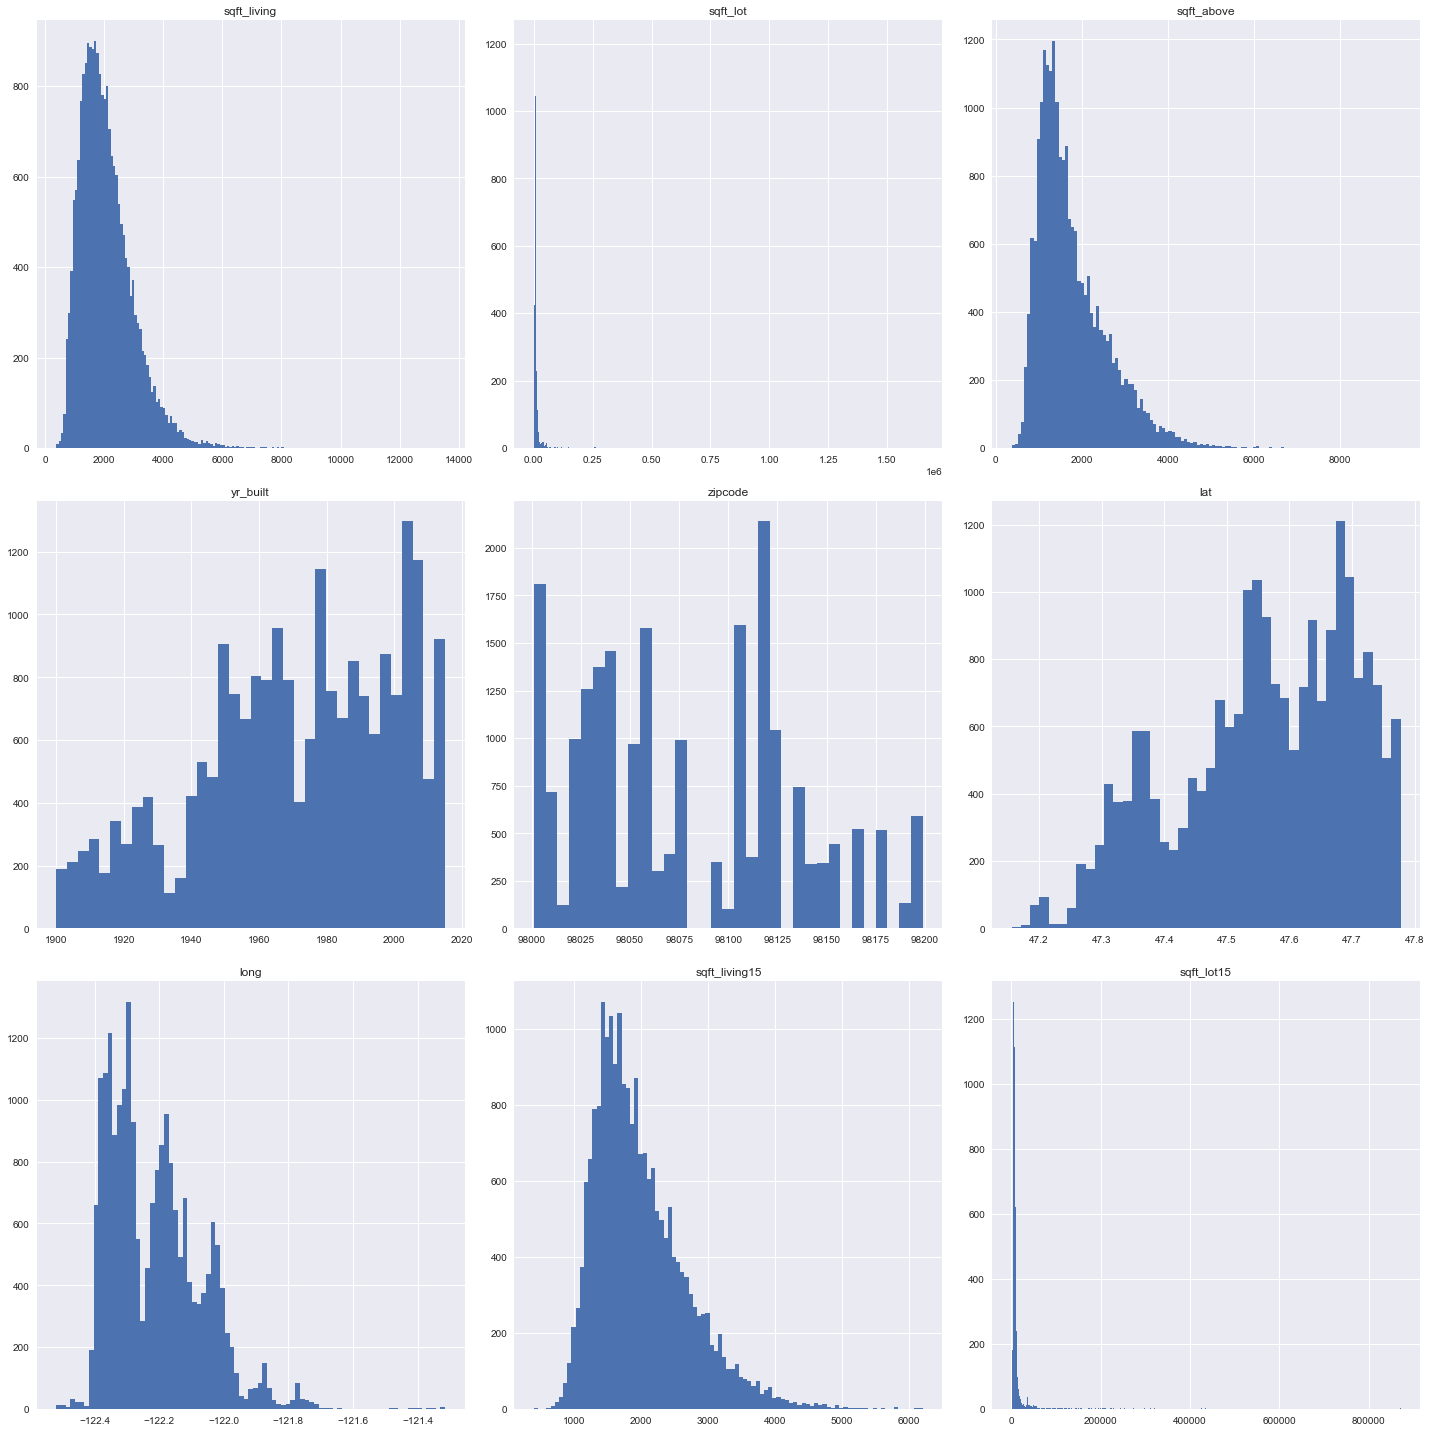

In [24]:
#Creating a histogram of each column of the dataframe to visually inspect each feature:
cont_preds_only = X_data_w_cat.iloc[:,0:9]


fig, axes = plt.subplots(nrows=(3), ncols=3, figsize=(20,20))
cont_preds_only_cols = cont_preds_only.columns

for col, ax in zip(cont_preds_only_cols, axes.flatten()):
    ax.hist(cont_preds_only[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [25]:
#creating new dataframe that is log transformed
X_data_w_cat_log_trsfm = X_data_w_cat.copy()

#I will drop 'yr_built','zipcode', and 'long' since they have a low correlation with price, and considerable correlations
#with several other predictors. I will keep "lat" for now, since it has a pretty high correlation with price,
#and low correlations with the several other predictors:
X_data_w_cat_log_trsfm.drop(['yr_built','long','zipcode'],axis=1,inplace=True)

In [26]:
#I will log transform the right skewed features:

continuous_features = ['sqft_living','sqft_above','sqft_lot','sqft_living15','sqft_lot15']

for ftr in continuous_features:
    X_data_w_cat_log_trsfm['log_'+ftr] = np.log(X_data_w_cat_log_trsfm[ftr])
X_data_w_cat_log_trsfm.head()

,sqft_living,sqft_lot,sqft_above,lat,sqft_living15,sqft_lot15,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,flr__1.5,flr__2.0,flr__2.5,flr__3.0,flr__3.5,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15
15279,780,16344,780,47.4739,1700,10387,0,0,0,1,...,0,0,0,0,0,6.659294,6.659294,9.701616,7.438384,9.248310
465,430,5050,430,47.6499,1200,7500,0,0,0,1,...,0,0,0,0,0,6.063785,6.063785,8.527144,7.090077,8.922658
16184,730,9975,730,47.4808,860,9000,0,0,0,1,...,0,0,0,0,0,6.593045,6.593045,9.207837,6.756932,9.104980
8267,860,10426,860,47.4987,1140,11250,0,0,0,1,...,0,0,0,0,0,6.756932,6.756932,9.252058,7.038784,9.328123
2139,520,22334,520,47.4799,1572,10570,0,0,0,1,...,0,0,0,0,0,6.253829,6.253829,10.013865,7.360104,9.265775


In [27]:
#I will drop the 'non-transformed' original columns:
X_data_w_cat_log_trsfm = X_data_w_cat_log_trsfm.drop(['sqft_living','sqft_lot','sqft_living15','sqft_lot15',
                                                      'sqft_above'],axis=1)
X_data_w_cat_log_trsfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                21428 non-null  float64
 1   view_EXCELLENT     21428 non-null  uint8  
 2   view_FAIR          21428 non-null  uint8  
 3   view_GOOD          21428 non-null  uint8  
 4   view_NONE          21428 non-null  uint8  
 5   view_missing       21428 non-null  uint8  
 6   cond_Fair          21428 non-null  uint8  
 7   cond_Good          21428 non-null  uint8  
 8   cond_Poor          21428 non-null  uint8  
 9   cond_Very Good     21428 non-null  uint8  
 10  grd_11 Excellent   21428 non-null  uint8  
 11  grd_12 Luxury      21428 non-null  uint8  
 12  grd_13 Mansion     21428 non-null  uint8  
 13  grd_3 Poor         21428 non-null  uint8  
 14  grd_4 Low          21428 non-null  uint8  
 15  grd_5 Fair         21428 non-null  uint8  
 16  grd_6 Low Average  

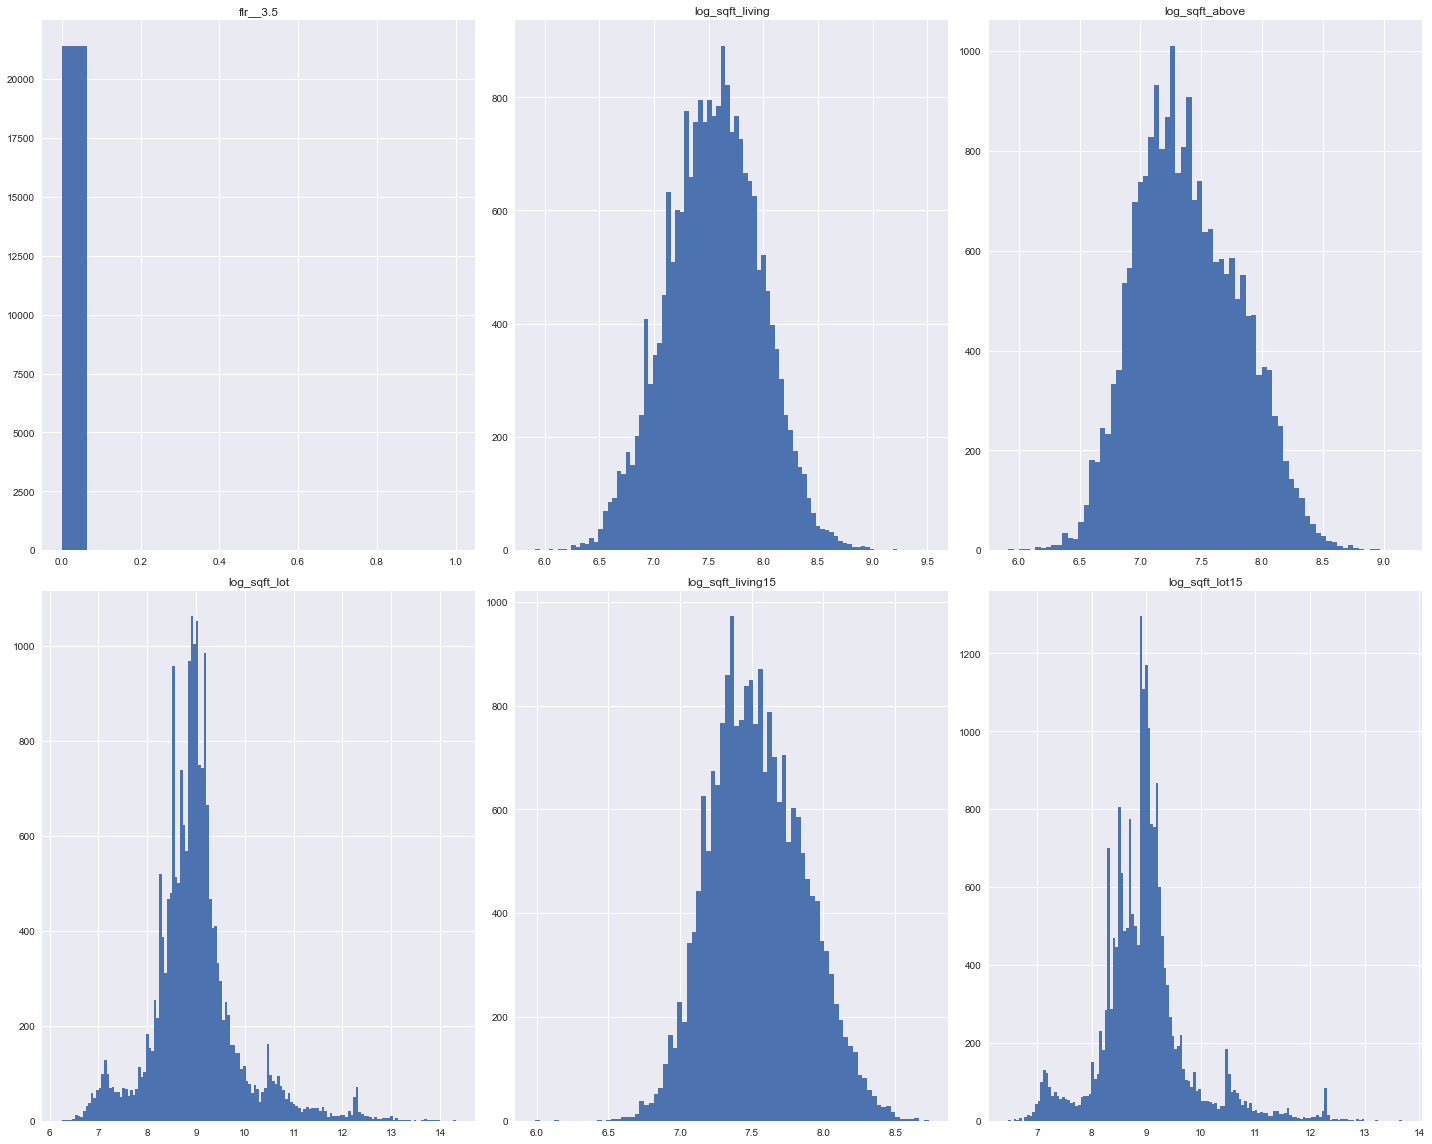

In [28]:
#Histogram of features after log transform:

#Creating a histogram of each column of the dataframe to visually inspect each feature:
trnsfrmd_only = X_data_w_cat_log_trsfm.iloc[:,65:]


fig, axes = plt.subplots(nrows=(2), ncols=3, figsize=(20,16))
trnsfrmd_only_cols = trnsfrmd_only.columns

for col, ax in zip(trnsfrmd_only_cols, axes.flatten()):
    ax.hist(trnsfrmd_only[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

## Pre-processing is complete I will create two dataframes one scaled, and one not scaled 

In [29]:
#I now have the complete dataframe. The data has all the categorical values converted into dummy variables,and
#all the interactions included. The data is also log transformed. Creating a dataframe that is not scaled that 
#I will use to create my final dataframe (for easier interpretation) once my final features are selected: 

#Completely pre-processed Dataframe with no scale
X_data_preproc_cmplt_no_scale = X_data_w_cat_log_trsfm.copy()

#1. Seperating the dataframe into seperate parts with continuous and categorical data. Since
#these columns are non-consecutive I will divide into all the consecutive parts and then
#concatenate in the order they were in the original dataframe:
cat_vars_1 =  X_data_w_cat_log_trsfm.iloc[:,1:66]
cont_vars_2 =  X_data_w_cat_log_trsfm.iloc[:,np.r_[0,66:70,70]]


#Scaling the dataframes with continuous data:
cont_vars_2_scaled = (cont_vars_2 - np.mean(cont_vars_2))/ np.std(cont_vars_2)

#putting the datframe back together:
X_data_preproc_cmplt_scaled = pd.concat([cat_vars_1,cont_vars_2_scaled],axis=1)
X_data_preproc_cmplt_scaled.head()

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_missing,cond_Fair,cond_Good,cond_Poor,cond_Very Good,grd_11 Excellent,...,flr__2.0,flr__2.5,flr__3.0,flr__3.5,lat,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15
15279,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,-0.620853,-2.102607,-1.723180,0.786994,-0.308130,0.350573
465,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0.647803,-3.508571,-3.120120,-0.520168,-1.373820,-0.051790
16184,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,-0.571116,-2.259018,-1.878588,0.237429,-2.393120,0.173479
8267,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.442088,-1.872088,-1.494141,0.286646,-1.530759,0.449187
2139,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,-0.577604,-3.059888,-2.674317,1.134521,-0.547636,0.372152


In [30]:
X_data_preproc_cmplt_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   view_EXCELLENT     21428 non-null  uint8  
 1   view_FAIR          21428 non-null  uint8  
 2   view_GOOD          21428 non-null  uint8  
 3   view_NONE          21428 non-null  uint8  
 4   view_missing       21428 non-null  uint8  
 5   cond_Fair          21428 non-null  uint8  
 6   cond_Good          21428 non-null  uint8  
 7   cond_Poor          21428 non-null  uint8  
 8   cond_Very Good     21428 non-null  uint8  
 9   grd_11 Excellent   21428 non-null  uint8  
 10  grd_12 Luxury      21428 non-null  uint8  
 11  grd_13 Mansion     21428 non-null  uint8  
 12  grd_3 Poor         21428 non-null  uint8  
 13  grd_4 Low          21428 non-null  uint8  
 14  grd_5 Fair         21428 non-null  uint8  
 15  grd_6 Low Average  21428 non-null  uint8  
 16  grd_7 Average      

# Feature Selection

## Baseline models:

In [31]:
# I will begin by creating three different baseline models:

# 1. The feature with the highest corellation to the dependent variable (price)
# 2. The dataframe with all the features, as well as 'dummy' features, log transformations
# 3. In this dataframe I have dropped some 'generalized' features with high explanatory overlap.

In [32]:
#check to see how features correlate with 'price':

pd.set_option('display.max_rows', None)
corr_train_data = pd.concat([y_data, X_data_preproc_cmplt_scaled], axis=1)
abs_corr_train_data_price = corr_train_data.corr().price.apply(lambda x: abs(x))
abs_corr_train_data_price.sort_values(ascending=False).head(20)

price                1.000000
log_sqft_living      0.673606
log_sqft_living15    0.607271
log_sqft_above       0.584432
lat                  0.450110
bthrm__1.0           0.339781
grd_7 Average        0.337364
view_NONE            0.327100
grd_9 Better         0.310535
grd_6 Low Average    0.309619
grd_11 Excellent     0.279746
flr__2.0             0.278656
bdrm__4              0.226270
view_EXCELLENT       0.223593
bthrm__3.5           0.208360
bdrm__3              0.191951
bthrm__3.25          0.190208
bdrm__5              0.180959
bdrm__2              0.180730
grd_12 Luxury        0.179048
Name: price, dtype: float64

In [33]:
#setting up baseline dataframes:

baseline_1a = X_data_preproc_cmplt_scaled[['log_sqft_living']]
baseline_2 = X_data_preproc_cmplt_scaled
baseline_3 = X_data_preproc_cmplt_scaled.drop(['log_sqft_living','log_sqft_living15','log_sqft_lot15',
                                               'log_sqft_above'],axis =1)

In [34]:
baseline_1a_df = sm.add_constant(baseline_1a)
model_baseline_1a = sm.OLS(y_data,baseline_1a_df).fit()
model_baseline_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.780e+04
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:44   Log-Likelihood:                -10161.
No. Observations:               21428   AIC:                         2.033e+04
Df Residuals:                   21426   BIC:                         2.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0468      0.003   4912.115      0.000      13.042      13.052
log_sqft_living     0.3543      0.003    133.407      0.000       0.349       0.360
==============================================================================
Omnibus:                      124.020   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.354
Skew:                           0.143   Prob(JB):                     1.47e-25
Kurtosis:                       2.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
baseline_2_df = sm.add_constant(baseline_2)
model_baseline_2 = sm.OLS(y_data,baseline_2_df).fit()
model_baseline_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     943.6
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:44   Log-Likelihood:                -1426.0
No. Observations:               21428   AIC:                             2996.
Df Residuals:                   21356   BIC:                             3570.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.2822      0.131    101.145      0.000      13.025      13.540
view_EXCELLENT        0.1358      0.020      6.854      0.000       0.097       0.175
view_FAIR             0.0458      0.017      2.759      0.006       0.013       0.078
view_GOOD             0.0674      0.014      4.693      0.000       0.039       0.096
view_NONE            -0.1494      0.009    -16.885      0.000      -0.167      -0.132
view_missing         -0.1166      0.034     -3.398      0.001      -0.184      -0.049
cond_Fair            -0.0737      0.020     -3.644      0.000      -0.113      -0.034
cond_Good             0.0943      0.004     21.593      0.000       0.086       0.103
cond_Poor            -0.1552      0.049     -3.191      0.001      -0.250      -0.060
cond_Very Good        0.1821      0.007     26.265      0.000       0.168       0.196
grd_11 Excellent      0.1209      0.016      7.678      0.000       0.090       0.152
grd_12 Luxury         0.3069      0.031     10.059      0.000       0.247       0.367
grd_13 Mansion        0.5676      0.082      6.929      0.000       0.407       0.728
grd_3 Poor           -0.0355      0.262     -0.136      0.892      -0.549       0.478
grd_4 Low            -0.7213      0.054    -13.242      0.000      -0.828      -0.615
grd_5 Fair           -0.6966      0.021    -32.758      0.000      -0.738      -0.655
grd_6 Low Average    -0.5911      0.013    -44.831      0.000      -0.617      -0.565
grd_7 Average        -0.4687      0.011    -43.797      0.000      -0.490      -0.448
grd_8 Good           -0.3225      0.010    -33.199      0.000      -0.342      -0.303
grd_9 Better         -0.1415      0.010    -14.720      0.000      -0.160      -0.123
wtrfrnt_YES           0.4369      0.027     16.469      0.000       0.385       0.489
wtrfrnt_missing      -0.0072      0.006     -1.270      0.204      -0.018       0.004
bdrm__2              -0.0234      0.020     -1.165      0.244      -0.063       0.016
bdrm__3              -0.0946      0.020     -4.671      0.000      -0.134      -0.055
bdrm__4              -0.1082      0.021     -5.202      0.000      -0.149      -0.067
bdrm__5              -0.1171      0.022     -5.354      0.000      -0.160      -0.074
bdrm__6              -0.1354      0.027     -5.098      0.000      -0.187      -0.083
bdrm__7              -0.1865      0.048     -3.868      0.000      -0.281      -0.092
bdrm__8              -0.0313      0.076     -0.411      0.681      -0.181       0.118
bdrm__9               0.0299      0.119      0.252      0.801      -0.203       0.263
bdrm__10             -0.0642      0.153     -0.419      0.675      -0.365       0.236
bdrm__11              0.0375      0.260      0.144      0.885      -0.472       0.547
bdrm__33              0.1590      0.260      0.612      0.541      -0.351

In [36]:
baseline_3_df = sm.add_constant(baseline_3)
model_baseline_3 = sm.OLS(y_data,baseline_3_df).fit()
model_baseline_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     835.1
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:44   Log-Likelihood:                -2857.6
No. Observations:               21428   AIC:                             5851.
Df Residuals:                   21360   BIC:                             6393.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.2851      0.140     94.738      0.000      13.010      13.560
view_EXCELLENT        0.1657      0.021      7.830      0.000       0.124       0.207
view_FAIR             0.0614      0.018      3.463      0.001       0.027       0.096
view_GOOD             0.0812      0.015      5.293      0.000       0.051       0.111
view_NONE            -0.1984      0.009    -21.161      0.000      -0.217      -0.180
view_missing         -0.1392      0.037     -3.794      0.000      -0.211      -0.067
cond_Fair            -0.0855      0.022     -3.954      0.000      -0.128      -0.043
cond_Good             0.1000      0.005     21.473      0.000       0.091       0.109
cond_Poor            -0.0992      0.052     -1.911      0.056      -0.201       0.003
cond_Very Good        0.1877      0.007     25.427      0.000       0.173       0.202
grd_11 Excellent      0.1806      0.017     10.764      0.000       0.148       0.214
grd_12 Luxury         0.4228      0.033     13.002      0.000       0.359       0.487
grd_13 Mansion        0.7272      0.087      8.312      0.000       0.556       0.899
grd_3 Poor           -0.4599      0.280     -1.643      0.100      -1.009       0.089
grd_4 Low            -1.1232      0.058    -19.508      0.000      -1.236      -1.010
grd_5 Fair           -1.0519      0.022    -48.926      0.000      -1.094      -1.010
grd_6 Low Average    -0.8882      0.013    -70.455      0.000      -0.913      -0.863
grd_7 Average        -0.6901      0.010    -66.578      0.000      -0.710      -0.670
grd_8 Good           -0.4693      0.010    -47.571      0.000      -0.489      -0.450
grd_9 Better         -0.2045      0.010    -20.077      0.000      -0.224      -0.185
wtrfrnt_YES           0.4213      0.028     14.870      0.000       0.366       0.477
wtrfrnt_missing      -0.0060      0.006     -0.992      0.321      -0.018       0.006
bdrm__2               0.0419      0.021      1.959      0.050   -1.75e-05       0.084
bdrm__3               0.0295      0.021      1.382      0.167      -0.012       0.071
bdrm__4               0.0879      0.022      4.055      0.000       0.045       0.130
bdrm__5               0.1214      0.023      5.357      0.000       0.077       0.166
bdrm__6               0.1194      0.028      4.318      0.000       0.065       0.174
bdrm__7               0.0718      0.051      1.406      0.160      -0.028       0.172
bdrm__8               0.2784      0.081      3.436      0.001       0.120       0.437
bdrm__9               0.3576      0.127      2.821      0.005       0.109       0.606
bdrm__10              0.2838      0.164      1.735      0.083      -0.037       0.604
bdrm__11              0.3079      0.278      1.107      0.268      -0.237       0.853
bdrm__33              0.2720      0.278      0.979      0.328      -0.273

<b>While removing several features that 'encompassed' much of the explanatory value of other features, drop the R-squared by about three points, I think it was a worthy trade-off because it makes for a more stable model, where we can more decisively isolate the explanatory power of each feature.
</b>

## Manually removing features with high p-values 

In [37]:
#Removing features with p=values over .2:
features_1 = baseline_3.drop(['wtrfrnt_missing','bdrm__11','bdrm__33','bthrm__0.75','bthrm__7.5','flr__3.5'],axis=1) 

In [38]:
features_1_df = sm.add_constant(features_1)
model_features_1 = sm.OLS(y_data,features_1_df).fit()
model_features_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     917.3
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:45   Log-Likelihood:                -2860.0
No. Observations:               21428   AIC:                             5844.
Df Residuals:                   21366   BIC:                             6338.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.4498      0.040    338.323      0.000      13.372      13.528
view_EXCELLENT        0.1654      0.021      7.817      0.000       0.124       0.207
view_FAIR             0.0614      0.018      3.464      0.001       0.027       0.096
view_GOOD             0.0810      0.015      5.279      0.000       0.051       0.111
view_NONE            -0.1983      0.009    -21.155      0.000      -0.217      -0.180
view_missing         -0.1391      0.037     -3.791      0.000      -0.211      -0.067
cond_Fair            -0.0853      0.022     -3.946      0.000      -0.128      -0.043
cond_Good             0.1001      0.005     21.482      0.000       0.091       0.109
cond_Poor            -0.0993      0.052     -1.913      0.056      -0.201       0.002
cond_Very Good        0.1879      0.007     25.468      0.000       0.173       0.202
grd_11 Excellent      0.1806      0.017     10.763      0.000       0.148       0.213
grd_12 Luxury         0.4232      0.032     13.028      0.000       0.360       0.487
grd_13 Mansion        0.7280      0.087      8.321      0.000       0.556       0.899
grd_3 Poor           -0.4520      0.280     -1.615      0.106      -1.000       0.096
grd_4 Low            -1.1192      0.057    -19.501      0.000      -1.232      -1.007
grd_5 Fair           -1.0525      0.021    -48.965      0.000      -1.095      -1.010
grd_6 Low Average    -0.8882      0.013    -70.475      0.000      -0.913      -0.864
grd_7 Average        -0.6900      0.010    -66.583      0.000      -0.710      -0.670
grd_8 Good           -0.4693      0.010    -47.574      0.000      -0.489      -0.450
grd_9 Better         -0.2046      0.010    -20.082      0.000      -0.225      -0.185
wtrfrnt_YES           0.4225      0.028     14.920      0.000       0.367       0.478
bdrm__2               0.0383      0.021      1.800      0.072      -0.003       0.080
bdrm__3               0.0258      0.021      1.215      0.224      -0.016       0.067
bdrm__4               0.0841      0.022      3.904      0.000       0.042       0.126
bdrm__5               0.1177      0.023      5.221      0.000       0.073       0.162
bdrm__6               0.1152      0.028      4.185      0.000       0.061       0.169
bdrm__7               0.0681      0.051      1.336      0.182      -0.032       0.168
bdrm__8               0.2765      0.081      3.432      0.001       0.119       0.434
bdrm__9               0.3590      0.116      3.100      0.002       0.132       0.586
bdrm__10              0.2807      0.164      1.717      0.086      -0.040       0.601
bthrm__1.0            0.0656      0.035      1.883      0.060      -0.003       0.134
bthrm__1.25           0.0805      0.104      0.774      0.439      -0.123       0.284
bthrm__1.5            0.1070      0.036      2.997      0.003       0.037

In [39]:
#Removing any features with p-values in the double digits:
features_2 = features_1.drop(['grd_3 Poor','bdrm__3','bdrm__7','bthrm__1.25','bthrm__6.5'],axis=1)

In [40]:
features_2_df = sm.add_constant(features_2)
model_features_2 = sm.OLS(y_data,features_2_df).fit()
model_features_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     998.9
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:45   Log-Likelihood:                -2863.7
No. Observations:               21428   AIC:                             5841.
Df Residuals:                   21371   BIC:                             6296.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.4746      0.035    388.808      0.000      13.407      13.543
view_EXCELLENT        0.1653      0.021      7.813      0.000       0.124       0.207
view_FAIR             0.0617      0.018      3.477      0.001       0.027       0.096
view_GOOD             0.0808      0.015      5.268      0.000       0.051       0.111
view_NONE            -0.1983      0.009    -21.155      0.000      -0.217      -0.180
view_missing         -0.1390      0.037     -3.788      0.000      -0.211      -0.067
cond_Fair            -0.0858      0.022     -3.971      0.000      -0.128      -0.043
cond_Good             0.1003      0.005     21.528      0.000       0.091       0.109
cond_Poor            -0.1009      0.052     -1.944      0.052      -0.203       0.001
cond_Very Good        0.1878      0.007     25.461      0.000       0.173       0.202
grd_11 Excellent      0.1820      0.017     10.861      0.000       0.149       0.215
grd_12 Luxury         0.4227      0.032     13.021      0.000       0.359       0.486
grd_13 Mansion        0.7238      0.087      8.289      0.000       0.553       0.895
grd_4 Low            -1.1300      0.057    -19.934      0.000      -1.241      -1.019
grd_5 Fair           -1.0555      0.021    -49.546      0.000      -1.097      -1.014
grd_6 Low Average    -0.8883      0.013    -70.613      0.000      -0.913      -0.864
grd_7 Average        -0.6893      0.010    -66.583      0.000      -0.710      -0.669
grd_8 Good           -0.4687      0.010    -47.547      0.000      -0.488      -0.449
grd_9 Better         -0.2040      0.010    -20.037      0.000      -0.224      -0.184
wtrfrnt_YES           0.4220      0.028     14.906      0.000       0.367       0.478
bdrm__2               0.0136      0.007      2.088      0.037       0.001       0.026
bdrm__4               0.0583      0.005     12.415      0.000       0.049       0.068
bdrm__5               0.0917      0.008     11.397      0.000       0.076       0.107
bdrm__6               0.0904      0.018      5.096      0.000       0.056       0.125
bdrm__8               0.2504      0.078      3.220      0.001       0.098       0.403
bdrm__9               0.3323      0.114      2.914      0.004       0.109       0.556
bdrm__10              0.2549      0.162      1.572      0.116      -0.063       0.573
bthrm__1.0            0.0649      0.032      2.021      0.043       0.002       0.128
bthrm__1.5            0.1068      0.033      3.250      0.001       0.042       0.171
bthrm__1.75           0.1686      0.032      5.193      0.000       0.105       0.232
bthrm__2.0            0.1808      0.033      5.532      0.000       0.117       0.245
bthrm__2.25           0.1930      0.033      5.875      0.000       0.129       0.257
bthrm__2.5            0.2050      0.033      6.281      0.000       0.141

In [41]:
#Removing any features with p-values over .05:
features_3 = features_2.drop(['cond_Poor','bdrm__10'],axis=1)

In [42]:
features_3_df = sm.add_constant(features_3)
model_features_3 = sm.OLS(y_data,features_3_df).fit()
model_features_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1036.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:45   Log-Likelihood:                -2866.9
No. Observations:               21428   AIC:                             5844.
Df Residuals:                   21373   BIC:                             6282.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.4750      0.035    388.783      0.000      13.407      13.543
view_EXCELLENT        0.1645      0.021      7.775      0.000       0.123       0.206
view_FAIR             0.0611      0.018      3.446      0.001       0.026       0.096
view_GOOD             0.0805      0.015      5.252      0.000       0.050       0.111
view_NONE            -0.1986      0.009    -21.182      0.000      -0.217      -0.180
view_missing         -0.1392      0.037     -3.793      0.000      -0.211      -0.067
cond_Fair            -0.0850      0.022     -3.930      0.000      -0.127      -0.043
cond_Good             0.1007      0.005     21.641      0.000       0.092       0.110
cond_Very Good        0.1881      0.007     25.512      0.000       0.174       0.203
grd_11 Excellent      0.1817      0.017     10.846      0.000       0.149       0.215
grd_12 Luxury         0.4221      0.032     13.002      0.000       0.358       0.486
grd_13 Mansion        0.7237      0.087      8.286      0.000       0.552       0.895
grd_4 Low            -1.1339      0.057    -20.013      0.000      -1.245      -1.023
grd_5 Fair           -1.0593      0.021    -49.934      0.000      -1.101      -1.018
grd_6 Low Average    -0.8887      0.013    -70.669      0.000      -0.913      -0.864
grd_7 Average        -0.6893      0.010    -66.582      0.000      -0.710      -0.669
grd_8 Good           -0.4687      0.010    -47.550      0.000      -0.488      -0.449
grd_9 Better         -0.2039      0.010    -20.028      0.000      -0.224      -0.184
wtrfrnt_YES           0.4218      0.028     14.896      0.000       0.366       0.477
bdrm__2               0.0135      0.007      2.073      0.038       0.001       0.026
bdrm__4               0.0582      0.005     12.385      0.000       0.049       0.067
bdrm__5               0.0915      0.008     11.375      0.000       0.076       0.107
bdrm__6               0.0896      0.018      5.052      0.000       0.055       0.124
bdrm__8               0.2501      0.078      3.215      0.001       0.098       0.403
bdrm__9               0.3320      0.114      2.911      0.004       0.108       0.556
bthrm__1.0            0.0646      0.032      2.010      0.044       0.002       0.128
bthrm__1.5            0.1063      0.033      3.234      0.001       0.042       0.171
bthrm__1.75           0.1684      0.032      5.186      0.000       0.105       0.232
bthrm__2.0            0.1807      0.033      5.529      0.000       0.117       0.245
bthrm__2.25           0.1927      0.033      5.867      0.000       0.128       0.257
bthrm__2.5            0.2049      0.033      6.277      0.000       0.141       0.269
bthrm__2.75           0.2557      0.033      7.662      0.000       0.190       0.321
bthrm__3.0            0.2837      0.034      8.356      0.000       0.217

## Checking for multi-colinearity using the VIF 

<b>With all the p-values below .05, I will direct my attention toward reducing
<b>multi-colinearity:

In [43]:
# Using V.I.F to identify the features that are most highly correlated with all the other features:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(features_3.values, i) for i in range(features_3.shape[1])]
pd.Series(vif, index=features_3.columns, name="Variance Inflation Factor")

view_EXCELLENT        1.818826
view_FAIR             1.332951
view_GOOD             1.510708
view_NONE            20.956567
view_missing          1.067069
cond_Fair             1.035367
cond_Good             1.596238
cond_Very Good        1.203570
grd_11 Excellent      1.405275
grd_12 Luxury         1.206301
grd_13 Mansion        1.291930
grd_4 Low             1.026245
grd_5 Fair            1.340227
grd_6 Low Average     3.884111
grd_7 Average        11.561338
grd_8 Good            7.119254
grd_9 Better          3.325710
wtrfrnt_YES           1.512626
bdrm__2               1.519526
bdrm__4               1.966020
bdrm__5               1.333486
bdrm__6               1.112072
bdrm__8               1.025373
bdrm__9               1.016330
bthrm__1.0            9.229021
bthrm__1.5            3.946751
bthrm__1.75           7.037409
bthrm__2.0            4.861230
bthrm__2.25           5.167352
bthrm__2.5           12.181238
bthrm__2.75           3.325467
bthrm__3.0            2.465330
bthrm__3

In [44]:
#I will begin by dropping features with a V.I.F of two digits:

vif_ser = pd.Series(vif, index=features_3.columns, name="Variance Inflation Factor")
elim_lst = list(vif_ser[vif_ser>=10].index)
features_4 = features_3.drop(elim_lst,axis=1)

In [45]:
features_4_df = sm.add_constant(features_4)
model_features_4 = sm.OLS(y_data,features_4_df).fit()
model_features_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     801.2
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:48   Log-Likelihood:                -5189.6
No. Observations:               21428   AIC:                         1.048e+04
Df Residuals:                   21376   BIC:                         1.090e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8735      0.007   1728.291      0.000      12.859      12.888
view_EXCELLENT        0.4492      0.022     20.727      0.000       0.407       0.492
view_FAIR             0.2755      0.017     15.991      0.000       0.242       0.309
view_GOOD             0.3295      0.014     23.222      0.000       0.302       0.357
view_missing          0.0685      0.040      1.726      0.084      -0.009       0.146
cond_Fair            -0.1123      0.024     -4.662      0.000      -0.159      -0.065
cond_Good             0.0944      0.005     18.209      0.000       0.084       0.105
cond_Very Good        0.1813      0.008     22.080      0.000       0.165       0.197
grd_11 Excellent      0.5763      0.018     32.779      0.000       0.542       0.611
grd_12 Luxury         0.7764      0.036     21.722      0.000       0.706       0.846
grd_13 Mansion        1.1147      0.097     11.475      0.000       0.924       1.305
grd_4 Low            -0.5882      0.060     -9.843      0.000      -0.705      -0.471
grd_5 Fair           -0.4065      0.021    -19.713      0.000      -0.447      -0.366
grd_6 Low Average    -0.2239      0.008    -26.999      0.000      -0.240      -0.208
grd_8 Good            0.1103      0.005     20.335      0.000       0.100       0.121
grd_9 Better          0.3130      0.008     41.310      0.000       0.298       0.328
wtrfrnt_YES           0.3973      0.032     12.608      0.000       0.336       0.459
bdrm__2               0.0263      0.007      3.618      0.000       0.012       0.041
bdrm__4               0.0773      0.005     14.800      0.000       0.067       0.087
bdrm__5               0.0937      0.009     10.451      0.000       0.076       0.111
bdrm__6               0.0452      0.020      2.288      0.022       0.006       0.084
bdrm__8               0.1598      0.087      1.843      0.065      -0.010       0.330
bdrm__9               0.0926      0.127      0.729      0.466      -0.156       0.341
bthrm__1.0           -0.2057      0.009    -22.576      0.000      -0.224      -0.188
bthrm__1.5           -0.1589      0.010    -15.802      0.000      -0.179      -0.139
bthrm__1.75          -0.0853      0.008    -10.362      0.000      -0.101      -0.069
bthrm__2.0           -0.0731      0.009     -8.065      0.000      -0.091      -0.055
bthrm__2.25          -0.0338      0.008     -4.102      0.000      -0.050      -0.018
bthrm__2.75           0.0764      0.010      7.487      0.000       0.056       0.096
bthrm__3.0            0.1144      0.012      9.293      0.000       0.090       0.138
bthrm__3.25           0.2680      0.014     19.413      0.000       0.241       0.295
bthrm__3.5            0.2826      0.013     22.305      0.000       0.258       0.307
bthrm__3.75           0.4108      0.026     15.750      0.000       0.360

In [46]:
#Removing any additonal features that have shown up with p-values over .05:
features_5 = features_4.drop(['view_missing','bdrm__8','bdrm__9','bthrm__5.75','bthrm__6.75',
                             'flr__3.0'],axis=1)

In [47]:
# Using V.I.F to identify the features that are most highly correlated with all the other features:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(features_5.values, i) for i in range(features_5.shape[1])]
pd.Series(vif, index=features_5.columns, name="Variance Inflation Factor")

view_EXCELLENT       1.549463
view_FAIR            1.026085
view_GOOD            1.062907
cond_Fair            1.033617
cond_Good            1.521771
cond_Very Good       1.172310
grd_11 Excellent     1.248634
grd_12 Luxury        1.154111
grd_13 Mansion       1.254129
grd_4 Low            1.008858
grd_5 Fair           1.074543
grd_6 Low Average    1.462768
grd_8 Good           1.577017
grd_9 Better         1.449332
wtrfrnt_YES          1.507551
bdrm__2              1.511366
bdrm__4              1.770995
bdrm__5              1.285252
bdrm__6              1.101650
bthrm__1.0           1.887765
bthrm__1.5           1.128286
bthrm__1.75          1.254813
bthrm__2.0           1.165362
bthrm__2.25          1.203211
bthrm__2.75          1.181588
bthrm__3.0           1.118922
bthrm__3.25          1.127591
bthrm__3.5           1.181405
bthrm__3.75          1.055281
bthrm__4.0           1.066343
bthrm__4.25          1.058772
bthrm__4.5           1.074644
bthrm__4.75          1.036240
bthrm__5.0

In [48]:
features_5_df = sm.add_constant(features_5)
model_features_5 = sm.OLS(y_data,features_5_df).fit()
model_features_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     907.4
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:50   Log-Likelihood:                -5196.8
No. Observations:               21428   AIC:                         1.049e+04
Df Residuals:                   21382   BIC:                         1.085e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8777      0.007   1789.974      0.000      12.864      12.892
view_EXCELLENT        0.4491      0.022     20.731      0.000       0.407       0.492
view_FAIR             0.2748      0.017     15.958      0.000       0.241       0.309
view_GOOD             0.3290      0.014     23.187      0.000       0.301       0.357
cond_Fair            -0.1126      0.024     -4.674      0.000      -0.160      -0.065
cond_Good             0.0935      0.005     18.122      0.000       0.083       0.104
cond_Very Good        0.1801      0.008     22.008      0.000       0.164       0.196
grd_11 Excellent      0.5794      0.018     33.051      0.000       0.545       0.614
grd_12 Luxury         0.7869      0.035     22.248      0.000       0.718       0.856
grd_13 Mansion        1.1282      0.096     11.765      0.000       0.940       1.316
grd_4 Low            -0.5897      0.060     -9.868      0.000      -0.707      -0.473
grd_5 Fair           -0.4066      0.021    -19.716      0.000      -0.447      -0.366
grd_6 Low Average    -0.2241      0.008    -27.016      0.000      -0.240      -0.208
grd_8 Good            0.1112      0.005     20.630      0.000       0.101       0.122
grd_9 Better          0.3141      0.008     41.622      0.000       0.299       0.329
wtrfrnt_YES           0.4002      0.031     12.714      0.000       0.339       0.462
bdrm__2               0.0261      0.007      3.594      0.000       0.012       0.040
bdrm__4               0.0760      0.005     14.613      0.000       0.066       0.086
bdrm__5               0.0922      0.009     10.324      0.000       0.075       0.110
bdrm__6               0.0434      0.020      2.197      0.028       0.005       0.082
bthrm__1.0           -0.2089      0.009    -23.280      0.000      -0.227      -0.191
bthrm__1.5           -0.1609      0.010    -16.041      0.000      -0.181      -0.141
bthrm__1.75          -0.0880      0.008    -10.821      0.000      -0.104      -0.072
bthrm__2.0           -0.0753      0.009     -8.343      0.000      -0.093      -0.058
bthrm__2.25          -0.0343      0.008     -4.161      0.000      -0.050      -0.018
bthrm__2.75           0.0756      0.010      7.418      0.000       0.056       0.096
bthrm__3.0            0.1147      0.012      9.328      0.000       0.091       0.139
bthrm__3.25           0.2693      0.014     19.554      0.000       0.242       0.296
bthrm__3.5            0.2830      0.013     22.360      0.000       0.258       0.308
bthrm__3.75           0.4121      0.026     15.811      0.000       0.361       0.463
bthrm__4.0            0.4193      0.028     15.008      0.000       0.365       0.474
bthrm__4.25           0.5334      0.036     14.814      0.000       0.463       0.604
bthrm__4.5            0.4171      0.033     12.751      0.000       0.353

<b> Given that all the V.I.F(s) are under five, I will look at high multi-colinearity pair-wise;
<b> paying particular attention to those with the highest correlations with price,since multi-
<b>colinearity between these would create much greater (unexpected) fluctuations in the dependent
<b> variable

In [49]:
#check to see how features correlate with 'price':

pd.set_option('display.max_rows', None)
features_5_corr_mtx = pd.concat([y_data,features_5],axis=1)
features_5_corr_mtx_abs = features_5_corr_mtx.corr().price.apply(lambda x: abs(x))
features_5_corr_mtx_abs.sort_values(ascending=False).head(20)

price                1.000000
lat                  0.450110
bthrm__1.0           0.339781
grd_9 Better         0.310535
grd_6 Low Average    0.309619
grd_11 Excellent     0.279746
flr__2.0             0.278656
bdrm__4              0.226270
view_EXCELLENT       0.223593
bthrm__3.5           0.208360
bthrm__3.25          0.190208
bdrm__5              0.180959
bdrm__2              0.180730
grd_12 Luxury        0.179048
view_GOOD            0.173134
wtrfrnt_YES          0.170171
grd_5 Fair           0.146765
log_sqft_lot         0.136703
bthrm__3.75          0.131357
bthrm__4.0           0.128680
Name: price, dtype: float64

In [50]:
pr_ws = features_5.corr().abs().stack().reset_index().sort_values(0, ascending=False)

pr_ws['pairs'] = list(zip(pr_ws.level_0, pr_ws.level_1))

pr_ws.set_index(['pairs'], inplace = True)

pr_ws.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
pr_ws.columns = ['cc']

pr_ws.drop_duplicates(inplace=True)

pr_ws[(pr_ws.cc>.60) & (pr_ws.cc<1)]

,cc
pairs,


In [51]:
#I created an alternate model 5a, since I noticed that 'lat' has a high impact on
#the normality of the residual distribution:

features_5a = features_5.drop('lat',axis=1)
features_5a_df = sm.add_constant(features_5a)
model_features_5a = sm.OLS(y_data,features_5a_df).fit()
model_features_5a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     471.2
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:50   Log-Likelihood:                -9377.2
No. Observations:               21428   AIC:                         1.884e+04
Df Residuals:                   21383   BIC:                         1.920e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8555      0.009   1470.896      0.000      12.838      12.873
view_EXCELLENT        0.4772      0.026     18.126      0.000       0.426       0.529
view_FAIR             0.2881      0.021     13.767      0.000       0.247       0.329
view_GOOD             0.2952      0.017     17.125      0.000       0.261       0.329
cond_Fair            -0.1385      0.029     -4.731      0.000      -0.196      -0.081
cond_Good             0.0679      0.006     10.843      0.000       0.056       0.080
cond_Very Good        0.1855      0.010     18.645      0.000       0.166       0.205
grd_11 Excellent      0.6795      0.021     31.946      0.000       0.638       0.721
grd_12 Luxury         0.8945      0.043     20.816      0.000       0.810       0.979
grd_13 Mansion        1.2653      0.117     10.857      0.000       1.037       1.494
grd_4 Low            -0.6990      0.073     -9.625      0.000      -0.841      -0.557
grd_5 Fair           -0.5281      0.025    -21.104      0.000      -0.577      -0.479
grd_6 Low Average    -0.2971      0.010    -29.581      0.000      -0.317      -0.277
grd_8 Good            0.1364      0.007     20.843      0.000       0.124       0.149
grd_9 Better          0.3794      0.009     41.519      0.000       0.362       0.397
wtrfrnt_YES           0.3448      0.038      9.015      0.000       0.270       0.420
bdrm__2               0.0854      0.009      9.694      0.000       0.068       0.103
bdrm__4               0.0815      0.006     12.890      0.000       0.069       0.094
bdrm__5               0.1095      0.011     10.091      0.000       0.088       0.131
bdrm__6               0.0714      0.024      2.978      0.003       0.024       0.118
bthrm__1.0           -0.1755      0.011    -16.098      0.000      -0.197      -0.154
bthrm__1.5           -0.1466      0.012    -12.030      0.000      -0.170      -0.123
bthrm__1.75          -0.0585      0.010     -5.919      0.000      -0.078      -0.039
bthrm__2.0           -0.0630      0.011     -5.748      0.000      -0.084      -0.042
bthrm__2.25          -0.0030      0.010     -0.301      0.763      -0.023       0.017
bthrm__2.75           0.1064      0.012      8.590      0.000       0.082       0.131
bthrm__3.0            0.1549      0.015     10.370      0.000       0.126       0.184
bthrm__3.25           0.3453      0.017     20.659      0.000       0.313       0.378
bthrm__3.5            0.3433      0.015     22.340      0.000       0.313       0.373
bthrm__3.75           0.5125      0.032     16.194      0.000       0.451       0.575
bthrm__4.0            0.5075      0.034     14.953      0.000       0.441       0.574
bthrm__4.25           0.6076      0.044     13.889      0.000       0.522       0.693
bthrm__4.5            0.5026      0.040     12.644      0.000       0.425

<b>The JB score drops greatly once the 'lat' feature is removed, but so does the R-squared(about 15 points).
<b>I will try to see if anything can be done to more closely approximate a normal residual distribution, without <b>removing this feature.

# Assumptions of Multiple Linear Regression 

##  I will use some visulizations to review residual normality, and homosdeskacity :

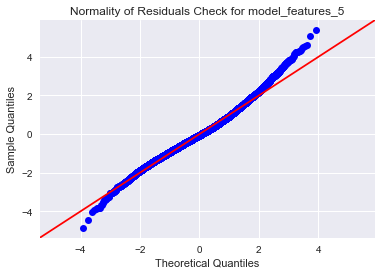

In [52]:
fig = sm.graphics.qqplot(model_features_5.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for model_features_5');

<font size="2"><b>Above is a qq plot of comparing the distribution of the residuals in 'model_features_5' to a normal distribution. This model includes the 'cb_rt_lat' feature.</b></font>

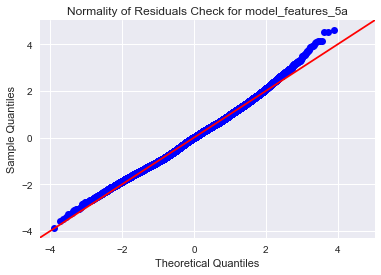

In [53]:
fig = sm.graphics.qqplot(model_features_5a.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for model_features_5a');

<font size="2"><b>Above is a qq plot of comparing the distribution of the residuals in 'model_features_5a' to a normal distribution. This model dropped the 'cb_rt_lat' feature.</b></font>

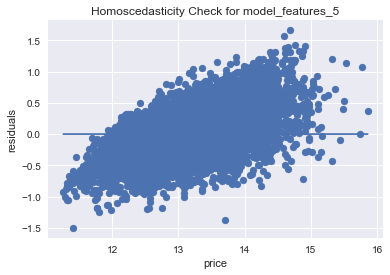

In [54]:
plt.scatter(y_data, model_features_5.resid)
plt.plot(y_data, [0 for i in range (len(features_5))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for model_features_5');

<font size="2"><b>Above is a scatter plot used to visually inspect for heteroscedasticity.</b></font>

<font size="3"><b>I see that there is some change in the variance on both extremes of the plot. The goal is to trim the ends of the plot, and retrain the model on the new data set. I will check to see if this also helps with the normality of the residual distribution. To this end, I will create a new dataframe that includes, price, residuals,predicted prices, as well as their corresponding z-scores.</b></font>

## Creating New Dataframe with the latest feature set (full_feature_set):

<b> Dataframe includes price, residuals, predicted variables, and their respective z-scores

In [55]:
#creating a 'predicted_list' to add to the prices predicted by the model to the dataframe:
predicted_list = list(model_features_5.predict(features_5_df))

#joining 'price' with the independent variables:
full_feature_set = pd.concat([y_data,features_5_df],axis=1)

#adding predicted prices and residuals to the dataframe:
full_feature_set['preds'] = predicted_list
full_feature_set['resids'] = model_features_5.resid
full_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21428 non-null  float64
 1   const              21428 non-null  float64
 2   view_EXCELLENT     21428 non-null  uint8  
 3   view_FAIR          21428 non-null  uint8  
 4   view_GOOD          21428 non-null  uint8  
 5   cond_Fair          21428 non-null  uint8  
 6   cond_Good          21428 non-null  uint8  
 7   cond_Very Good     21428 non-null  uint8  
 8   grd_11 Excellent   21428 non-null  uint8  
 9   grd_12 Luxury      21428 non-null  uint8  
 10  grd_13 Mansion     21428 non-null  uint8  
 11  grd_4 Low          21428 non-null  uint8  
 12  grd_5 Fair         21428 non-null  uint8  
 13  grd_6 Low Average  21428 non-null  uint8  
 14  grd_8 Good         21428 non-null  uint8  
 15  grd_9 Better       21428 non-null  uint8  
 16  wtrfrnt_YES        

In [56]:
#Creating the z-score columns, and initially assigning them the values of their corresponding features:

full_feature_set['z_score_resids'] = full_feature_set['resids']
full_feature_set['z_score_price'] = full_feature_set['price']
full_feature_set['z_score_preds'] = full_feature_set['preds']

In [57]:
#Creating variables representing the mean and standard deviation: 
resids_mean = full_feature_set.resids.mean()
resids_std = full_feature_set.resids.std()
price_mean = full_feature_set.price.mean()
price_std = full_feature_set.price.std()
preds_mean = full_feature_set.preds.mean()
preds_std = full_feature_set.preds.std()


#Applying their respective z-scores to the z_score columns:
full_feature_set['z_score_resids']=  full_feature_set['z_score_resids'].apply(lambda x:(abs( (x-resids_mean)/resids_std ))) 
full_feature_set['z_score_price'] =  full_feature_set['z_score_price'].apply(lambda x:(abs( (x-price_mean)/price_std) ))
full_feature_set['z_score_preds'] =  full_feature_set['z_score_preds'].apply(lambda x:(abs ((x-preds_mean)/preds_std) ) )

full_feature_set.head()

,price,const,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,...,flr__1.5,flr__2.0,flr__2.5,lat,log_sqft_lot,preds,resids,z_score_resids,z_score_price,z_score_preds
15279,11.264464,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.620853,0.786994,12.192835,-0.928371,3.010391,3.388161,2.003780
465,11.289782,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0.647803,-0.520168,12.290941,-1.001159,3.246418,3.340032,1.773571
16184,11.302204,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.571116,0.237429,12.174654,-0.872450,2.829057,3.316417,2.046442
8267,11.314475,1.0,0,0,0,0,0,0,0,0,...,0,0,0,-0.442088,0.286646,12.362162,-1.047687,3.397292,3.293091,1.606449
2139,11.320554,1.0,0,0,0,1,0,0,0,0,...,0,0,0,-0.577604,1.134521,12.108260,-0.787707,2.554264,3.281535,2.202238


### Removing some residuals to improve Heteroscedasticity:

In [58]:
#Creating a sub-dataframe with the 'price' greater than 12 , and less than 14.5
full_feature_set = full_feature_set.loc[(full_feature_set['price'] > 12) & (full_feature_set['price'] < 14.5)]

#splitting data set so I can create a new model:
y_data_II = full_feature_set['price']
new_df_II = full_feature_set.drop(['price','preds','resids','z_score_price','z_score_resids','z_score_preds'],axis=1)
new_df_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20931 entries, 16893 to 19513
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              20931 non-null  float64
 1   view_EXCELLENT     20931 non-null  uint8  
 2   view_FAIR          20931 non-null  uint8  
 3   view_GOOD          20931 non-null  uint8  
 4   cond_Fair          20931 non-null  uint8  
 5   cond_Good          20931 non-null  uint8  
 6   cond_Very Good     20931 non-null  uint8  
 7   grd_11 Excellent   20931 non-null  uint8  
 8   grd_12 Luxury      20931 non-null  uint8  
 9   grd_13 Mansion     20931 non-null  uint8  
 10  grd_4 Low          20931 non-null  uint8  
 11  grd_5 Fair         20931 non-null  uint8  
 12  grd_6 Low Average  20931 non-null  uint8  
 13  grd_8 Good         20931 non-null  uint8  
 14  grd_9 Better       20931 non-null  uint8  
 15  wtrfrnt_YES        20931 non-null  uint8  
 16  bdrm__2           

In [59]:
model_features_6 = sm.OLS(y_data_II,new_df_II).fit()
model_features_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     824.2
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:50   Log-Likelihood:                -4143.3
No. Observations:               20931   AIC:                             8373.
Df Residuals:                   20888   BIC:                             8714.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8784      0.007   1858.275      0.000      12.865      12.892
view_EXCELLENT        0.4261      0.022     19.147      0.000       0.383       0.470
view_FAIR             0.2567      0.017     15.288      0.000       0.224       0.290
view_GOOD             0.3207      0.014     23.000      0.000       0.293       0.348
cond_Fair            -0.0725      0.025     -2.920      0.004      -0.121      -0.024
cond_Good             0.0852      0.005     17.039      0.000       0.075       0.095
cond_Very Good        0.1633      0.008     20.580      0.000       0.148       0.179
grd_11 Excellent      0.5317      0.018     29.262      0.000       0.496       0.567
grd_12 Luxury         0.7036      0.042     16.702      0.000       0.621       0.786
grd_13 Mansion        1.1167      0.296      3.778      0.000       0.537       1.696
grd_4 Low            -0.3286      0.076     -4.298      0.000      -0.478      -0.179
grd_5 Fair           -0.2770      0.022    -12.450      0.000      -0.321      -0.233
grd_6 Low Average    -0.1988      0.008    -24.465      0.000      -0.215      -0.183
grd_8 Good            0.1171      0.005     22.641      0.000       0.107       0.127
grd_9 Better          0.3207      0.007     44.159      0.000       0.307       0.335
wtrfrnt_YES           0.3100      0.035      8.941      0.000       0.242       0.378
bdrm__2               0.0310      0.007      4.381      0.000       0.017       0.045
bdrm__4               0.0736      0.005     14.690      0.000       0.064       0.083
bdrm__5               0.0903      0.009     10.426      0.000       0.073       0.107
bdrm__6               0.0528      0.019      2.747      0.006       0.015       0.091
bthrm__1.0           -0.1886      0.009    -21.694      0.000      -0.206      -0.172
bthrm__1.5           -0.1520      0.010    -15.735      0.000      -0.171      -0.133
bthrm__1.75          -0.0835      0.008    -10.682      0.000      -0.099      -0.068
bthrm__2.0           -0.0725      0.009     -8.370      0.000      -0.089      -0.056
bthrm__2.25          -0.0329      0.008     -4.154      0.000      -0.048      -0.017
bthrm__2.75           0.0800      0.010      8.184      0.000       0.061       0.099
bthrm__3.0            0.1030      0.012      8.660      0.000       0.080       0.126
bthrm__3.25           0.2483      0.014     18.378      0.000       0.222       0.275
bthrm__3.5            0.2794      0.012     22.797      0.000       0.255       0.303
bthrm__3.75           0.3958      0.026     15.232      0.000       0.345       0.447
bthrm__4.0            0.3541      0.029     12.286      0.000       0.298       0.411
bthrm__4.25           0.4795      0.040     12.138      0.000       0.402       0.557
bthrm__4.5            0.3694      0.033     11.145      0.000       0.304

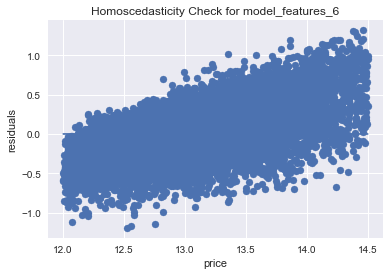

In [60]:
plt.scatter(y_data_II,model_features_6.resid)
plt.plot(y_data_II, [0 for i in range (len(new_df_II))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for model_features_6');

<font size="2"><b>The variance in the scatter plot above looks pretty uniform.</b></font>

### Rechecking for Multi-colinearity

<font size="3"><b>After I removed some of the residuals, I noticed that the condition number went up very sharply. I 
will recheck the V.I.F scores, and the correlation matrix for this new dataframe.
</b></font>

In [61]:
# Using V.I.F to identify the features that are most highly correlated with all the other features:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(new_df_II.values, i) for i in range(new_df_II.shape[1])]
pd.Series(vif, index=new_df_II.columns, name="Variance Inflation Factor")

const                11.532904
view_EXCELLENT        1.398076
view_FAIR             1.009699
view_GOOD             1.037636
cond_Fair             1.019516
cond_Good             1.169195
cond_Very Good        1.101667
grd_11 Excellent      1.178669
grd_12 Luxury         1.096675
grd_13 Mansion        1.002153
grd_4 Low             1.005117
grd_5 Fair            1.046502
grd_6 Low Average     1.304920
grd_8 Good            1.313048
grd_9 Better          1.361722
wtrfrnt_YES           1.385942
bdrm__2               1.318744
bdrm__4               1.313722
bdrm__5               1.212367
bdrm__6               1.084905
bthrm__1.0            2.591969
bthrm__1.5            1.415877
bthrm__1.75           1.813957
bthrm__2.0            1.494702
bthrm__2.25           1.312440
bthrm__2.75           1.207782
bthrm__3.0            1.135359
bthrm__3.25           1.113358
bthrm__3.5            1.162796
bthrm__3.75           1.046868
bthrm__4.0            1.052052
bthrm__4.25           1.035754
bthrm__4

In [62]:
pd.set_option('display.max_columns', None)
full_feature_set.corr()

,price,const,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__6.0,bthrm__6.25,bthrm__7.75,bthrm__8.0,flr__1.5,flr__2.0,flr__2.5,lat,log_sqft_lot,preds,resids,z_score_resids,z_score_price,z_score_preds
price,1.000000,NaN,0.169607,0.093125,0.167505,-0.067977,-0.043439,0.055165,0.239948,0.126447,0.019341,-0.029660,-0.106993,-0.294057,0.117859,0.336170,0.108588,-0.159055,0.223723,0.164553,0.066405,-0.311058,-0.116039,-0.084738,-0.064580,0.022143,0.127320,0.102018,0.180847,0.215677,0.125369,0.107452,0.093777,0.100988,0.038957,0.042002,0.035881,0.029383,0.018612,NaN,NaN,NaN,0.044561,0.266605,0.080506,0.457586,0.123649,0.788458,0.555414,0.240472,0.149929,0.057806
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view_EXCELLENT,0.169607,NaN,1.000000,-0.013607,-0.016738,-0.009164,0.014950,0.020080,0.044235,0.055228,-0.000758,-0.002938,0.008392,-0.016191,-0.001238,0.049055,0.520156,0.007817,0.003784,0.018539,0.023593,-0.029129,-0.017305,-0.004981,-0.021011,-0.003115,0.034794,0.008168,0.017983,0.021344,0.045973,0.016257,0.019364,0.020710,-0.002399,-0.003035,-0.002276,-0.001517,0.044010,NaN,NaN,NaN,0.007284,0.001963,0.001738,0.001932,0.057029,0.221648,-0.024662,0.036615,0.147716,0.219961
view_FAIR,0.093125,NaN,-0.013607,1.000000,-0.018917,-0.005641,0.017676,0.010029,0.019936,-0.006307,-0.000857,0.025916,-0.003405,-0.018677,0.014944,0.026450,-0.002990,0.002798,0.011029,0.016551,-0.003265,-0.024552,-0.000740,0.008013,0.005511,0.000439,0.014195,0.004356,0.026337,0.037974,-0.000291,-0.003668,0.000905,-0.001767,-0.002711,-0.003430,0.016297,-0.001714,-0.001212,NaN,NaN,NaN,-0.003243,-0.019121,-0.010212,0.015010,0.016587,0.118077,-0.008644,0.015885,0.039195,0.060054
view_GOOD,0.167505,NaN,-0.016738,-0.018917,1.000000,-0.005013,0.013638,0.002779,0.075727,0.049101,-0.001054,-0.004085,-0.011030,-0.033611,0.006917,0.065189,0.044874,-0.024722,0.027512,0.025233,0.017713,-0.047628,-0.023269,-0.006171,-0.011637,-0.023906,0.034165,0.028999,0.051439,0.055560,0.019574,0.024162,0.040731,0.040652,0.011330,0.042164,-0.003164,-0.002109,0.031295,NaN,NaN,NaN,0.004946,0.007725,0.007027,-0.019267,0.071786,0.210730,-0.013310,0.048263,0.113843,0.164659
cond_Fair,-0.067977,NaN,-0.009164,-0.005641,-0.005013,1.000000,-0.050171,-0.024481,-0.010341,-0.004248,-0.000577,0.019288,0.047331,0.067994,-0.036323,-0.027692,-0.005816,0.036347,-0.014285,-0.021152,0.006283,0.062447,0.004989,0.004999,0.011522,-0.019540,-0.012764,-0.009505,-0.013669,-0.015513,-0.006754,-0.006098,-0.004403,-0.005333,-0.001826,-0.002310,-0.001732,-0.001155,-0.000816,NaN,NaN,NaN,0.006104,-0.044157,-0.006878,-0.019432,0.038976,-0.095922,0.019466,0.022720,0.030631,0.057830
cond_Good,-0.043439,NaN,0.014950,0.017676,0.013638,-0.050171,1.000000,-0.176071,-0.041530,-0.017749,-0.004152,0.012225,0.025004,0.056023,-0.047066,-0.078853,0.011275,0.000028,-0.030344,0.001652,0.012066,0.073028,0.048670,0.118884,0.022277,0.044323,0.005454,-0.034337,-0.045344,-0.086855,-0.020289,-0.024488,-0.009016,-0.023041,-0.003227,-0.008782,-0.012459,-0.008305,-0.005872,NaN,NaN,NaN,0.064976,-0.241347,-0.007128,-0.056677,0.124637,-0.051885,-0.000284,0.006862,0.018982,-0.003636
cond_Very Good,0.055165,NaN,0.020080,0.010029,0.002779,-0.024481,-0.176071,1.000000,-0.030484,-0.011418,-0.002026,-0.007849,0.032599,0.054944,-0.033674,-0.043112,0.010240,-0.007518,0.011378,0.015511,0.000814,0.002412,-0.004358,0.049213,0.083455,-0.022281,0.037545,0.008445,-0.007993,-0.025852,-0.006080,0.002968,-0.008717,-0.007584,-0.

### Dropping some more features, and creating a new model:

<font size="2"><b>Trimming the residuals appears to have produced some features with V.I.F values of 'Nan', 
and some with p-values over .05 .</b></font>

In [63]:
# Removing features with pearson coefficient equal to Nan, and feature with p-value greater than .05
y_data_III = y_data_II
new_df_III = new_df_II.drop(['bthrm__6.0','bthrm__6.25','bthrm__7.75','bthrm__8.0'],axis=1)
new_df_III.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20931 entries, 16893 to 19513
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              20931 non-null  float64
 1   view_EXCELLENT     20931 non-null  uint8  
 2   view_FAIR          20931 non-null  uint8  
 3   view_GOOD          20931 non-null  uint8  
 4   cond_Fair          20931 non-null  uint8  
 5   cond_Good          20931 non-null  uint8  
 6   cond_Very Good     20931 non-null  uint8  
 7   grd_11 Excellent   20931 non-null  uint8  
 8   grd_12 Luxury      20931 non-null  uint8  
 9   grd_13 Mansion     20931 non-null  uint8  
 10  grd_4 Low          20931 non-null  uint8  
 11  grd_5 Fair         20931 non-null  uint8  
 12  grd_6 Low Average  20931 non-null  uint8  
 13  grd_8 Good         20931 non-null  uint8  
 14  grd_9 Better       20931 non-null  uint8  
 15  wtrfrnt_YES        20931 non-null  uint8  
 16  bdrm__2           

In [64]:
model_features_7 = sm.OLS(y_data_III,new_df_III).fit()
model_features_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     844.3
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:52   Log-Likelihood:                -4143.9
No. Observations:               20931   AIC:                             8372.
Df Residuals:                   20889   BIC:                             8706.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8784      0.007   1858.269      0.000      12.865      12.892
view_EXCELLENT        0.4250      0.022     19.116      0.000       0.381       0.469
view_FAIR             0.2566      0.017     15.284      0.000       0.224       0.290
view_GOOD             0.3203      0.014     22.978      0.000       0.293       0.348
cond_Fair            -0.0725      0.025     -2.919      0.004      -0.121      -0.024
cond_Good             0.0852      0.005     17.046      0.000       0.075       0.095
cond_Very Good        0.1633      0.008     20.582      0.000       0.148       0.179
grd_11 Excellent      0.5315      0.018     29.255      0.000       0.496       0.567
grd_12 Luxury         0.6946      0.041     16.798      0.000       0.614       0.776
grd_13 Mansion        1.1165      0.296      3.777      0.000       0.537       1.696
grd_4 Low            -0.3286      0.076     -4.298      0.000      -0.478      -0.179
grd_5 Fair           -0.2769      0.022    -12.450      0.000      -0.321      -0.233
grd_6 Low Average    -0.1988      0.008    -24.465      0.000      -0.215      -0.183
grd_8 Good            0.1172      0.005     22.644      0.000       0.107       0.127
grd_9 Better          0.3208      0.007     44.164      0.000       0.307       0.335
wtrfrnt_YES           0.3111      0.035      8.978      0.000       0.243       0.379
bdrm__2               0.0310      0.007      4.380      0.000       0.017       0.045
bdrm__4               0.0736      0.005     14.696      0.000       0.064       0.083
bdrm__5               0.0899      0.009     10.392      0.000       0.073       0.107
bdrm__6               0.0527      0.019      2.740      0.006       0.015       0.090
bthrm__1.0           -0.1886      0.009    -21.692      0.000      -0.206      -0.172
bthrm__1.5           -0.1520      0.010    -15.732      0.000      -0.171      -0.133
bthrm__1.75          -0.0835      0.008    -10.677      0.000      -0.099      -0.068
bthrm__2.0           -0.0725      0.009     -8.366      0.000      -0.089      -0.055
bthrm__2.25          -0.0328      0.008     -4.147      0.000      -0.048      -0.017
bthrm__2.75           0.0801      0.010      8.199      0.000       0.061       0.099
bthrm__3.0            0.1032      0.012      8.672      0.000       0.080       0.127
bthrm__3.25           0.2486      0.014     18.406      0.000       0.222       0.275
bthrm__3.5            0.2798      0.012     22.840      0.000       0.256       0.304
bthrm__3.75           0.3963      0.026     15.249      0.000       0.345       0.447
bthrm__4.0            0.3548      0.029     12.316      0.000       0.298       0.411
bthrm__4.25           0.4805      0.039     12.166      0.000       0.403       0.558
bthrm__4.5            0.3702      0.033     11.171      0.000       0.305

### Re-checking for normality of the distribtion of the residuals:

<font size="3"><b>Removing the features with 'Nan' correlations brought the Cond. No. back down, but the Jarque-Bera score from the new model is still pretty elevated. I will try to improve the kurtosis and skew, so that they more closely resemble that of a normal distribution. </b></font>

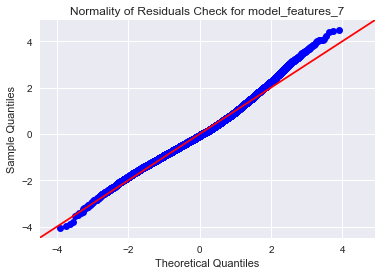

In [65]:
fig = sm.graphics.qqplot(model_features_7.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for model_features_7');

<font size="2"><b>Above is a qq plot of comparing the distribution of the residuals in 'model_features_7' to a normal distribution. The JB score is still pretty high. I will create a new feature set, with the intention of trimming some of the residuals at the uppper end, to more closely approximate a normal distribution.
</b></font>

## Creating New Dataframe with the latest feature set  (full_feature_set_II):

<b> Dataframe includes price, residuals, predicted variables, and their respective z-scores

<font size="3"><b>I will create a new feature set ,and sort it based on the residuals so that it coincides with the qq-plot. </b></font>

In [66]:
#creating a 'predicted_list' to add to the prices predicted by the model to the dataframe:
predicted_list_II = list(model_features_7.predict(new_df_III))

#joining 'price' with the independent variables:
full_feature_set_II = pd.concat([y_data_III,new_df_III],axis=1)

#adding predicted prices and residuals to the dataframe:
full_feature_set_II['preds'] = predicted_list_II
full_feature_set_II['resids'] = model_features_7.resid
full_feature_set_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20931 entries, 16893 to 19513
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20931 non-null  float64
 1   const              20931 non-null  float64
 2   view_EXCELLENT     20931 non-null  uint8  
 3   view_FAIR          20931 non-null  uint8  
 4   view_GOOD          20931 non-null  uint8  
 5   cond_Fair          20931 non-null  uint8  
 6   cond_Good          20931 non-null  uint8  
 7   cond_Very Good     20931 non-null  uint8  
 8   grd_11 Excellent   20931 non-null  uint8  
 9   grd_12 Luxury      20931 non-null  uint8  
 10  grd_13 Mansion     20931 non-null  uint8  
 11  grd_4 Low          20931 non-null  uint8  
 12  grd_5 Fair         20931 non-null  uint8  
 13  grd_6 Low Average  20931 non-null  uint8  
 14  grd_8 Good         20931 non-null  uint8  
 15  grd_9 Better       20931 non-null  uint8  
 16  wtrfrnt_YES       

In [67]:
#Creating the z-score columns, and initially assigning them the values of their corresponding features:

full_feature_set_II['z_score_resids'] = full_feature_set_II['resids']
full_feature_set_II['z_score_price'] = full_feature_set_II['price']
full_feature_set_II['z_score_preds'] = full_feature_set_II['preds']

In [68]:
#Creating variables representing the mean and standard deviation: 
resids_mean = full_feature_set_II.resids.mean()
resids_std = full_feature_set_II.resids.std()
price_mean = full_feature_set_II.price.mean()
price_std = full_feature_set_II.price.std()
preds_mean = full_feature_set_II.preds.mean()
preds_std = full_feature_set_II.preds.std()


#Applying their respective z-scores to the z_score columns:
full_feature_set_II['z_score_resids']=  full_feature_set_II['z_score_resids'].apply(lambda x:(abs( (x-resids_mean)/resids_std ))) 
full_feature_set_II['z_score_price'] =  full_feature_set_II['z_score_price'].apply(lambda x:(abs( (x-price_mean)/price_std) ))
full_feature_set_II['z_score_preds'] =  full_feature_set_II['z_score_preds'].apply(lambda x:(abs ((x-preds_mean)/preds_std) ) )

In [69]:
#sorting dataframe based on residuals
full_feature_set_sorted = full_feature_set_II.sort_values(by=['resids'])

#Removing some residuals on the right end of the plot:
full_feature_set_sorted = full_feature_set_sorted.iloc[0:20590,:]

#splitting the data to create a new model:
y_data_IV = full_feature_set_sorted['price']
new_df_IV = full_feature_set_sorted.drop(['price','preds','resids','z_score_price','z_score_resids',
                                   'z_score_preds'],axis=1)

In [70]:
model_features_8 = sm.OLS(y_data_IV,new_df_IV).fit()
model_features_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     943.7
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:52   Log-Likelihood:                -2586.6
No. Observations:               20590   AIC:                             5257.
Df Residuals:                   20548   BIC:                             5590.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8553      0.007   1971.557      0.000      12.843      12.868
view_EXCELLENT        0.4225      0.021     20.154      0.000       0.381       0.464
view_FAIR             0.2550      0.016     16.168      0.000       0.224       0.286
view_GOOD             0.3205      0.013     24.471      0.000       0.295       0.346
cond_Fair            -0.0772      0.023     -3.305      0.001      -0.123      -0.031
cond_Good             0.0855      0.005     18.244      0.000       0.076       0.095
cond_Very Good        0.1658      0.007     22.293      0.000       0.151       0.180
grd_11 Excellent      0.5802      0.017     34.108      0.000       0.547       0.614
grd_12 Luxury         0.7530      0.039     19.542      0.000       0.677       0.828
grd_13 Mansion        1.1681      0.275      4.248      0.000       0.629       1.707
grd_4 Low            -0.3119      0.071     -4.385      0.000      -0.451      -0.172
grd_5 Fair           -0.2908      0.021    -13.877      0.000      -0.332      -0.250
grd_6 Low Average    -0.1990      0.008    -26.198      0.000      -0.214      -0.184
grd_8 Good            0.1329      0.005     27.317      0.000       0.123       0.142
grd_9 Better          0.3420      0.007     49.922      0.000       0.329       0.355
wtrfrnt_YES           0.3045      0.033      9.291      0.000       0.240       0.369
bdrm__2               0.0343      0.007      5.178      0.000       0.021       0.047
bdrm__4               0.0758      0.005     16.135      0.000       0.067       0.085
bdrm__5               0.0854      0.008     10.476      0.000       0.069       0.101
bdrm__6               0.0496      0.018      2.731      0.006       0.014       0.085
bthrm__1.0           -0.1775      0.008    -21.764      0.000      -0.194      -0.162
bthrm__1.5           -0.1482      0.009    -16.336      0.000      -0.166      -0.130
bthrm__1.75          -0.0742      0.007    -10.116      0.000      -0.089      -0.060
bthrm__2.0           -0.0651      0.008     -8.016      0.000      -0.081      -0.049
bthrm__2.25          -0.0408      0.007     -5.484      0.000      -0.055      -0.026
bthrm__2.75           0.0765      0.009      8.331      0.000       0.058       0.094
bthrm__3.0            0.1013      0.011      9.071      0.000       0.079       0.123
bthrm__3.25           0.2245      0.013     17.537      0.000       0.199       0.250
bthrm__3.5            0.2534      0.012     21.774      0.000       0.231       0.276
bthrm__3.75           0.3793      0.025     15.397      0.000       0.331       0.428
bthrm__4.0            0.3416      0.027     12.566      0.000       0.288       0.395
bthrm__4.25           0.4654      0.037     12.443      0.000       0.392       0.539
bthrm__4.5            0.3499      0.031     11.147      0.000       0.288

<font size="3"><b>With a slight skew, and the kurtosis close to 3, the distribution of the residuals is now much closer to that of a normal distribution. </b></font>

### Rechecking Homoscedasticity holds after removing residuals to improve normality: 

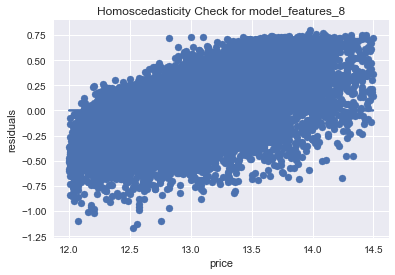

In [71]:
plt.scatter(y_data_IV,model_features_8.resid)
plt.plot(y_data_IV, [0 for i in range (len(new_df_IV))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for model_features_8');

<font size="3"><b>Given that the variance in residuals is still stable, I will make this my final model, and formally
confirm the four assumptions</b></font>

## Creating Final Model That is Scaled 

In [72]:
final_features_scaled = full_feature_set_sorted
model_final_scaled = model_features_8
y_data_final_scaled = y_data_IV
X_data_final_scaled = new_df_IV
final_features_scaled.head()

,price,const,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,flr__1.5,flr__2.0,flr__2.5,lat,log_sqft_lot,preds,resids,z_score_resids,z_score_price,z_score_preds
326,12.524435,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.528654,1.914320,13.718787,-1.194352,4.049274,1.086558,1.769709
7090,12.560244,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.305918,0.295047,13.735984,-1.175739,3.986171,1.012080,1.814999
19173,12.753037,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.330639,-0.504847,13.897988,-1.144951,3.881786,0.611091,2.241674
5861,12.072541,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.437830,0.217730,13.186008,-1.113467,3.775046,2.026450,0.366515
10084,12.206073,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.095437,0.536664,13.242801,-1.036728,3.514873,1.748719,0.516090


## Formally Confirming the Four Assumptions. 

### Assumption of Variable linearity:

In [73]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 15279 to 7245
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21428 non-null  object 
 1   price          21428 non-null  float64
 2   bedrooms       21428 non-null  int64  
 3   bathrooms      21428 non-null  float64
 4   sqft_living    21428 non-null  int64  
 5   sqft_lot       21428 non-null  int64  
 6   floors         21428 non-null  float64
 7   waterfront     19070 non-null  object 
 8   view           21367 non-null  object 
 9   condition      21428 non-null  object 
 10  grade          21428 non-null  object 
 11  sqft_above     21428 non-null  int64  
 12  sqft_basement  21428 non-null  object 
 13  yr_built       21428 non-null  int64  
 14  yr_renovated   17622 non-null  float64
 15  zipcode        21428 non-null  int64  
 16  lat            21428 non-null  float64
 17  long           21428 non-null  float64
 18  sqf

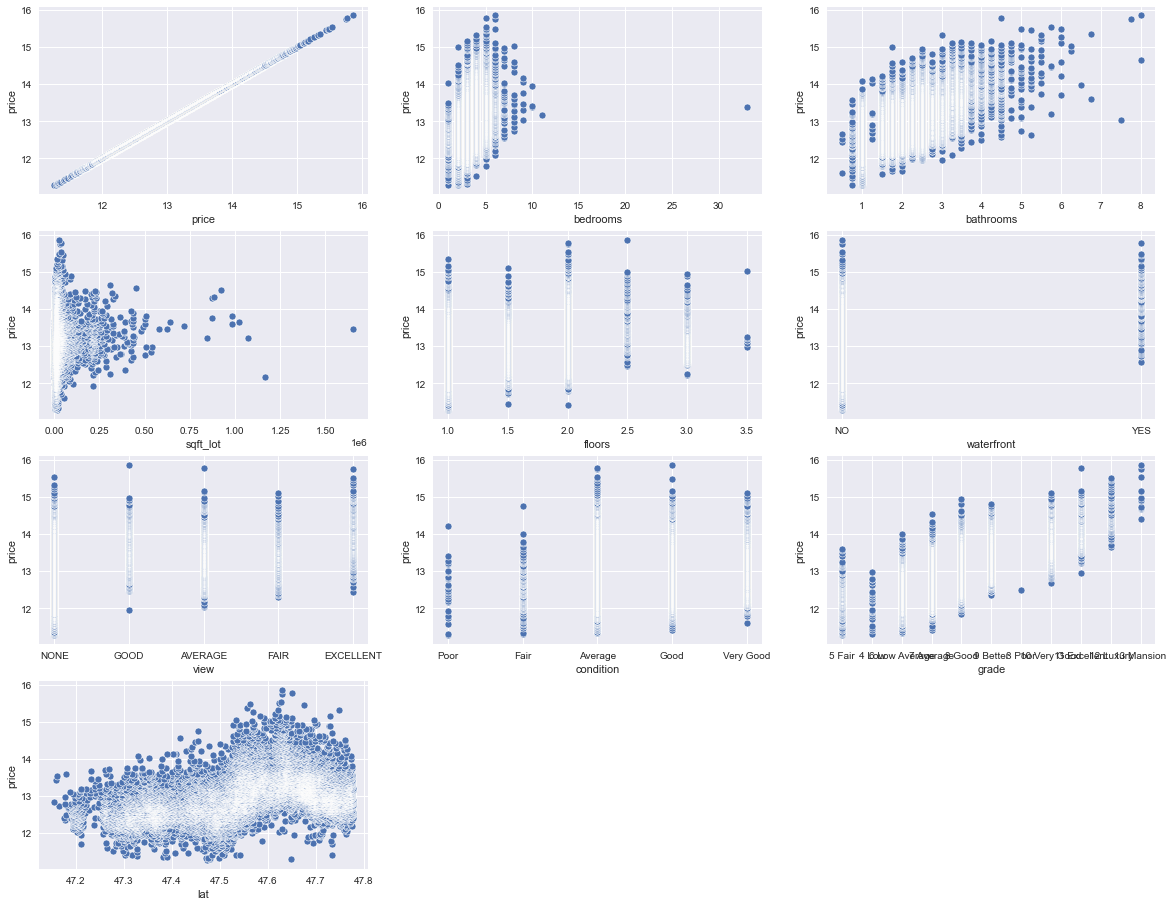

In [74]:
#Reviewing the scatter plots after the outliers are dropped

df_nums_non_null_only = kc_df.iloc[:,np.r_[1:4,5:11,16]]
df_nums_non_null_only_cols_list = list(df_nums_non_null_only.columns)

count=1
plt.subplots(figsize=(20, 20))
for i in df_nums_non_null_only.columns:
    plt.subplot(5,3,count)
    sns.scatterplot(df_nums_non_null_only[i],df_nums_non_null_only["price"])
    count+=1

plt.show()

<font size="3"><b>These scatter plots are based on the original dataframe, after removing the outliers. Viewing the 
features that were ultimately chosen, including the discrete variables before they were separated, we can see the 
linear realtionship between the dependent (price), and the independent variables. Although, some of these
correlations, are not perfectly linear, such as with the 'lat' feature, that has a downward trend toward the end 
of the plot, there is still a strong linear relationship that can be well explained by a linear model. This should satisfy the assumption of linearity.</b></font>

### Assumption of Variable Independence:

In [75]:
# Using V.I.F to identify the features that are most highly correlated with all the other features:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_data_final_scaled.values, i) for i in range(X_data_final_scaled.shape[1])]
pd.Series(vif, index=X_data_final_scaled.columns, name="Variance Inflation Factor")

const                11.605723
view_EXCELLENT        1.399282
view_FAIR             1.009735
view_GOOD             1.038161
cond_Fair             1.019606
cond_Good             1.169798
cond_Very Good        1.103227
grd_11 Excellent      1.190076
grd_12 Luxury         1.060081
grd_13 Mansion        1.002254
grd_4 Low             1.005205
grd_5 Fair            1.044900
grd_6 Low Average     1.302194
grd_8 Good            1.325622
grd_9 Better          1.380311
wtrfrnt_YES           1.388714
bdrm__2               1.320837
bdrm__4               1.312291
bdrm__5               1.207761
bdrm__6               1.084728
bthrm__1.0            2.605540
bthrm__1.5            1.419004
bthrm__1.75           1.823397
bthrm__2.0            1.500773
bthrm__2.25           1.311096
bthrm__2.75           1.207296
bthrm__3.0            1.135376
bthrm__3.25           1.111755
bthrm__3.5            1.160442
bthrm__3.75           1.047064
bthrm__4.0            1.052316
bthrm__4.25           1.035850
bthrm__4

In [76]:
pr_ws = X_data_final_scaled.corr().abs().stack().reset_index().sort_values(0, ascending=False)

pr_ws['pairs'] = list(zip(pr_ws.level_0, pr_ws.level_1))

pr_ws.set_index(['pairs'], inplace = True)

pr_ws.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
pr_ws.columns = ['cc']

pr_ws.drop_duplicates(inplace=True)

pr_ws[(pr_ws.cc>.50) & (pr_ws.cc<1)]

,cc
pairs,
"(wtrfrnt_YES, view_EXCELLENT)",0.521719


<font size="3"><b>Given that all the V.I.F scores (with the exception of const) are well under 5, and the highest pairwise correlation is at .52, I think that the variables have an acceptable level of indepence amongst themselves, and that the assumption of variable indepence is satisfied. </b></font>

### Assumption of the Normal Distribution of Residuals:

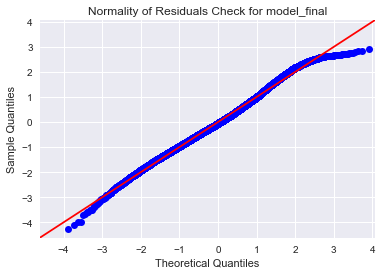

In [77]:
fig = sm.graphics.qqplot(model_final_scaled.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for model_final');

<font size="3"><b> With a Jarque Bera score of 64.7, a slight skew of .136, and the Kurtosis nearly at 3, with a score of 3.033, I think this satisfies the assumption of normality. </b></font>

### Assumption of Homoscedasticity:

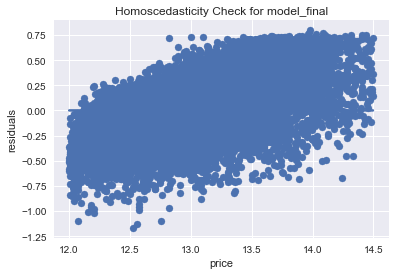

In [78]:
plt.scatter(y_data_final_scaled,model_final_scaled.resid)
plt.plot(y_data_final_scaled, [0 for i in range (len(X_data_final_scaled))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for model_final');

<font size="3"><b> Although the value of the residuals increase with price, the variance at each price point 
appears pretty consistent. This should satisfy the assumption of Homoscedasticity.</b></font>

<font size="2"><b>With these four assumptions satisfied, I will create one more model based on my final model, but with no scale, for easier interpretation. To that end, I will create a full feature dataframe, including the observed price, predicted price, residuals, and their respective z-scores. </b></font>

## Creating a Final Model That Is Not Scaled

In [79]:
#creating dataframe with no scale from the dependent and independent variables:
final_features_no_scale = pd.concat([y_data,X_data_preproc_cmplt_no_scale],axis=1)


#dropping the columns that don't match up with the scaled feature set: 
for col in final_features_no_scale.columns:
    if col not in final_features_scaled.columns:
        final_features_no_scale.drop(col,axis=1,inplace=True)
        

#matching up the rows with the scaled feature set:
final_features_no_scale = final_features_no_scale[final_features_no_scale.index.isin(final_features_scaled.index)]


#Given the 'no_scale' dataframe is missing the 'const' column , but includes 'price', and the scaled datframe is the 
#opposite case, these two should have the same shape:
final_features_no_scale.shape == X_data_final_scaled.shape

True

In [80]:
final_features_no_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20590 entries, 16893 to 16511
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20590 non-null  float64
 1   lat                20590 non-null  float64
 2   view_EXCELLENT     20590 non-null  uint8  
 3   view_FAIR          20590 non-null  uint8  
 4   view_GOOD          20590 non-null  uint8  
 5   cond_Fair          20590 non-null  uint8  
 6   cond_Good          20590 non-null  uint8  
 7   cond_Very Good     20590 non-null  uint8  
 8   grd_11 Excellent   20590 non-null  uint8  
 9   grd_12 Luxury      20590 non-null  uint8  
 10  grd_13 Mansion     20590 non-null  uint8  
 11  grd_4 Low          20590 non-null  uint8  
 12  grd_5 Fair         20590 non-null  uint8  
 13  grd_6 Low Average  20590 non-null  uint8  
 14  grd_8 Good         20590 non-null  uint8  
 15  grd_9 Better       20590 non-null  uint8  
 16  wtrfrnt_YES       

In [81]:
#splitting 'no_scale' dataframe:
X_data_final_no_scale = final_features_no_scale.drop('price',axis=1)
y_data_final_no_scale = final_features_no_scale['price']

#adding const:
X_data_final_no_scale   = sm.add_constant(X_data_final_no_scale)
final_features_no_scale = sm.add_constant(final_features_no_scale)

#creating model:
model_final_no_scale = sm.OLS(y_data_final_no_scale,X_data_final_no_scale).fit()
model_final_no_scale.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     943.7
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:27:55   Log-Likelihood:                -2586.6
No. Observations:               20590   AIC:                             5257.
Df Residuals:                   20548   BIC:                             5590.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -59.0728      0.680    -86.921      0.000     -60.405     -57.741
lat                   1.5024      0.014    105.639      0.000       1.475       1.530
view_EXCELLENT        0.4225      0.021     20.154      0.000       0.381       0.464
view_FAIR             0.2550      0.016     16.168      0.000       0.224       0.286
view_GOOD             0.3205      0.013     24.471      0.000       0.295       0.346
cond_Fair            -0.0772      0.023     -3.305      0.001      -0.123      -0.031
cond_Good             0.0855      0.005     18.244      0.000       0.076       0.095
cond_Very Good        0.1658      0.007     22.293      0.000       0.151       0.180
grd_11 Excellent      0.5802      0.017     34.108      0.000       0.547       0.614
grd_12 Luxury         0.7530      0.039     19.542      0.000       0.677       0.828
grd_13 Mansion        1.1681      0.275      4.248      0.000       0.629       1.707
grd_4 Low            -0.3119      0.071     -4.385      0.000      -0.451      -0.172
grd_5 Fair           -0.2908      0.021    -13.877      0.000      -0.332      -0.250
grd_6 Low Average    -0.1990      0.008    -26.198      0.000      -0.214      -0.184
grd_8 Good            0.1329      0.005     27.317      0.000       0.123       0.142
grd_9 Better          0.3420      0.007     49.922      0.000       0.329       0.355
wtrfrnt_YES           0.3045      0.033      9.291      0.000       0.240       0.369
bdrm__2               0.0343      0.007      5.178      0.000       0.021       0.047
bdrm__4               0.0758      0.005     16.135      0.000       0.067       0.085
bdrm__5               0.0854      0.008     10.476      0.000       0.069       0.101
bdrm__6               0.0496      0.018      2.731      0.006       0.014       0.085
bthrm__1.0           -0.1775      0.008    -21.764      0.000      -0.194      -0.162
bthrm__1.5           -0.1482      0.009    -16.336      0.000      -0.166      -0.130
bthrm__1.75          -0.0742      0.007    -10.116      0.000      -0.089      -0.060
bthrm__2.0           -0.0651      0.008     -8.016      0.000      -0.081      -0.049
bthrm__2.25          -0.0408      0.007     -5.484      0.000      -0.055      -0.026
bthrm__2.75           0.0765      0.009      8.331      0.000       0.058       0.094
bthrm__3.0            0.1013      0.011      9.071      0.000       0.079       0.123
bthrm__3.25           0.2245      0.013     17.537      0.000       0.199       0.250
bthrm__3.5            0.2534      0.012     21.774      0.000       0.231       0.276
bthrm__3.75           0.3793      0.025     15.397      0.000       0.331       0.428
bthrm__4.0            0.3416      0.027     12.566      0.000       0.288       0.395
bthrm__4.25           0.4654      0.037     12.443      0.000       0.392

In [82]:
final_features_no_scale_corr_mtx = final_features_no_scale.corr().price
final_features_no_scale_corr_mtx.sort_values(ascending=False)
#final_features_no_scale_corr_mtx

price                1.000000
lat                  0.464374
grd_9 Better         0.351629
flr__2.0             0.269100
grd_11 Excellent     0.253280
bdrm__4              0.231661
bthrm__3.5           0.215018
bthrm__3.25          0.179699
view_EXCELLENT       0.174553
view_GOOD            0.173844
bdrm__5              0.162807
grd_12 Luxury        0.133379
grd_8 Good           0.131498
bthrm__2.75          0.130650
bthrm__3.75          0.127192
log_sqft_lot         0.119955
wtrfrnt_YES          0.111437
bthrm__4.0           0.109916
bthrm__3.0           0.105404
bthrm__4.5           0.102306
view_FAIR            0.095951
bthrm__4.25          0.095749
flr__2.5             0.080973
bdrm__6              0.064336
cond_Very Good       0.059115
flr__1.5             0.051822
bthrm__5.25          0.038071
bthrm__4.75          0.036983
bthrm__5.0           0.036613
bthrm__5.5           0.031065
grd_13 Mansion       0.020370
bthrm__2.25          0.016308
grd_4 Low           -0.029915
cond_Good 

<b> Everything in the summary matches that of the 'scaled' model, with the exception of the condition number, which I think is simply due to removing the scaling.

In [83]:
#creating a 'predicted_list' to add to the prices predicted by the model to the dataframe:
predicted_list_no_scale = list(model_final_no_scale.predict(X_data_final_no_scale))


#adding predicted prices and residuals to the dataframe:
final_features_no_scale['preds'] = predicted_list_no_scale
final_features_no_scale['resids'] = model_final_no_scale.resid


#Creating the z-score columns, and initially assigning them the values of their corresponding features:
final_features_no_scale['z_score_resids'] = final_features_no_scale['resids']
final_features_no_scale['z_score_preds']  = final_features_no_scale['preds']
final_features_no_scale['z_score_price']  = final_features_no_scale['price']


#Creating variables representing the mean and standard deviation: 
resids_mean = full_feature_set_II.resids.mean()
resids_std = full_feature_set_II.resids.std()
price_mean = full_feature_set_II.price.mean()
price_std = full_feature_set_II.price.std()
preds_mean = full_feature_set_II.preds.mean()
preds_std = full_feature_set_II.preds.std()


#Applying their respective z-scores to the z_score columns:
final_features_no_scale['z_score_resids'] = final_features_no_scale['z_score_resids'].apply(lambda x:(abs( (x-resids_mean)/resids_std))) 
final_features_no_scale['z_score_price']  = final_features_no_scale['z_score_price'].apply(lambda x:(abs( (x-price_mean)/price_std)))
final_features_no_scale['z_score_preds']  = final_features_no_scale['z_score_preds'].apply(lambda x:(abs ((x-preds_mean)/preds_std)))


#Sorting based on Residuals to align index with the 'scaled' feature set:
final_features_no_scale = final_features_no_scale.sort_values(by=['resids'])


#The two feature sets should have the same shape:
final_features_scaled.shape == final_features_no_scale.shape

True

In [84]:
#adding a column with the absolute bvalues of the residuals to sort from least to greatest:
final_features_no_scale['abs_resids'] = final_features_no_scale['resids']
final_features_no_scale['abs_resids'] = final_features_no_scale['abs_resids'].apply(lambda x: abs(x))
final_features_no_scale = final_features_no_scale.sort_values(by=['abs_resids'])
final_features_no_scale.head()

,const,price,lat,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,flr__1.5,flr__2.0,flr__2.5,log_sqft_lot,preds,resids,z_score_resids,z_score_preds,z_score_price,abs_resids
5446,1.0,14.392124,47.5303,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,9.503159,14.392124,-2.657430e-12,9.140846e-12,3.543092,2.798033,2.657430e-12
17389,1.0,12.472276,47.3585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.285616,12.472256,2.000116e-05,6.781097e-05,1.513314,1.195045,2.000116e-05
2835,1.0,13.102161,47.6601,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.711722,13.102128,3.252634e-05,1.102757e-04,0.145597,0.115048,3.252634e-05
21353,1.0,13.030138,47.4917,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.660601,13.030181,-4.236338e-05,1.436268e-04,0.043892,0.034751,4.236338e-05
7284,1.0,12.774223,47.5033,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.856661,12.774171,5.267466e-05,1.785857e-04,0.718153,0.567026,5.267466e-05


# Renovation and Remodel Recommendations

## Baseline Features:

<b>
  Baseline model:                            <br>
         'const':  1                         <br>
           'lat':  47.56                     <br>
          'view':  'AVERAGE'        (default)<br>
     'condition':  'AVERAGE'        (default)<br>
         'grade':   '10 Very Good'  (default)<br>
    'waterfront':   'NO'            (default)<br>
      'bedrooms':   1               (default)<br>
     'bathrooms':   0.5             (default)<br>
        'floors':   1               (default)<br>
  'log_sqft_lot':   9                        <br>
  'price'       :   12.855537576059533   aprox.: 382903.231151
<b>   

## 1. Add a Second Floor:

In [85]:
#Created a dataframe to a see how changes in a certain feature impact the price:

house_features = [{'const':1, 'lat':47.56, 'view_EXCELLENT':0, 'view_FAIR':0, 'view_GOOD':0,
       'cond_Fair':0, 'cond_Good':0, 'cond_Very Good':0, 'grd_11 Excellent':0,
       'grd_12 Luxury':0, 'grd_13 Mansion':0, 'grd_4 Low':0, 'grd_5 Fair':0,
       'grd_6 Low Average':0, 'grd_8 Good':0, 'grd_9 Better':0, 'wtrfrnt_YES':0,
       'bdrm__2':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bthrm__1.0':0, 'bthrm__1.5':0,
       'bthrm__1.75':0, 'bthrm__2.0':0, 'bthrm__2.25':0, 'bthrm__2.75':0, 'bthrm__3.0':0,
       'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0, 'bthrm__4.0':0, 'bthrm__4.25':0,
       'bthrm__4.5':0, 'bthrm__4.75':0, 'bthrm__5.0':0, 'bthrm__5.25':0, 'bthrm__5.5':0,
       'flr__1.5':0, 'flr__2.0':1, 'flr__2.5':0, 'log_sqft_lot':9}]

In [86]:
house_features = pd.DataFrame(house_features)
house_features

,const,lat,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,flr__1.5,flr__2.0,flr__2.5,log_sqft_lot
0,1,47.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9


In [87]:
model_final_no_scale.predict(house_features)[0]

12.941941308413988

<font size="2"><b>
In this case, we have a log-level regression, where the dependent variable 'price', is log transformed, and the independent variable 'flr__2.0' is not. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
%(change in y) = 100 * ((e^b1) - 1)<br>

Based on this formula, with b1 = 0.0864, the change in y would be equal to 9.02423%. If we multiply 382,903.231151 by 1.0902423, we get 417,457.299407. If we compare this to the price predicted by the model in terms of an exponent, e^12.941941308413988 = 417458.872072. The log-level interpretation matches the predicted value with a precision of 99.99962328%.


</b></font>

## 2. Upgrading Building Grade to 'grd_11 Excellent:

In [88]:
#Created a dataframe to a see how changes in a certain feature impact the price:

house_features = [{'const':1, 'lat':47.56, 'view_EXCELLENT':0, 'view_FAIR':0, 'view_GOOD':0,
       'cond_Fair':0, 'cond_Good':0, 'cond_Very Good':0, 'grd_11 Excellent':1,
       'grd_12 Luxury':0, 'grd_13 Mansion':0, 'grd_4 Low':0, 'grd_5 Fair':0,
       'grd_6 Low Average':0, 'grd_8 Good':0, 'grd_9 Better':0, 'wtrfrnt_YES':0,
       'bdrm__2':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bthrm__1.0':0, 'bthrm__1.5':0,
       'bthrm__1.75':0, 'bthrm__2.0':0, 'bthrm__2.25':0, 'bthrm__2.75':0, 'bthrm__3.0':0,
       'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0, 'bthrm__4.0':0, 'bthrm__4.25':0,
       'bthrm__4.5':0, 'bthrm__4.75':0, 'bthrm__5.0':0, 'bthrm__5.25':0, 'bthrm__5.5':0,
       'flr__1.5':0, 'flr__2.0':0, 'flr__2.5':0, 'log_sqft_lot':9}]

In [89]:
house_features = pd.DataFrame(house_features)
house_features

,const,lat,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,flr__1.5,flr__2.0,flr__2.5,log_sqft_lot
0,1,47.56,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [90]:
model_final_no_scale.predict(house_features)[0]

13.43576963632787

<font size="2"><b>
In this case, we have a log-level regression, where the dependent variable 'price', is log transformed, and the independent variable 'grd_11 Excellent' is not. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
%(change in y) = 100 * ((e^b1) - 1)<br>

Based on this formula, with b1 = 0.5802, the change in y would be equal to 78.639567%. If we multiply 382,903.231151 by 1.78639567, we get 684,016.674157. If we compare this to the price predicted by the model in terms of an exponent, e^13.43576963632787 = 684,038.60586. The log-level interpretation matches the predicted value with a precision of 99.996793791%.


</b></font>

## 3. Upgrading to Four Bedrooms:

In [91]:
#Created a dataframe to a see how changes in a certain feature impact the price:

house_features = [{'const':1, 'lat':47.56, 'view_EXCELLENT':0, 'view_FAIR':0, 'view_GOOD':0,
       'cond_Fair':0, 'cond_Good':0, 'cond_Very Good':0, 'grd_11 Excellent':0,
       'grd_12 Luxury':0, 'grd_13 Mansion':0, 'grd_4 Low':0, 'grd_5 Fair':0,
       'grd_6 Low Average':0, 'grd_8 Good':0, 'grd_9 Better':0, 'wtrfrnt_YES':0,
       'bdrm__2':0, 'bdrm__4':1, 'bdrm__5':0, 'bdrm__6':0, 'bthrm__1.0':0, 'bthrm__1.5':0,
       'bthrm__1.75':0, 'bthrm__2.0':0, 'bthrm__2.25':0, 'bthrm__2.75':0, 'bthrm__3.0':0,
       'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0, 'bthrm__4.0':0, 'bthrm__4.25':0,
       'bthrm__4.5':0, 'bthrm__4.75':0, 'bthrm__5.0':0, 'bthrm__5.25':0, 'bthrm__5.5':0,
       'flr__1.5':0, 'flr__2.0':0, 'flr__2.5':0, 'log_sqft_lot':9}]

In [92]:
house_features = pd.DataFrame(house_features)
house_features

,const,lat,view_EXCELLENT,view_FAIR,view_GOOD,cond_Fair,cond_Good,cond_Very Good,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_8 Good,grd_9 Better,wtrfrnt_YES,bdrm__2,bdrm__4,bdrm__5,bdrm__6,bthrm__1.0,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,flr__1.5,flr__2.0,flr__2.5,log_sqft_lot
0,1,47.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [93]:
model_final_no_scale.predict(house_features)[0]

12.931293218903669

<font size="2"><b>
In this case, we have a log-level regression, where the dependent variable 'price', is log transformed, and the independent variable 'bdrm__4' is not. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
%(change in y) = 100 * ((e^b1) - 1)<br>

Based on this formula, with b1 = 0.0758, the change in y would be equal to 7.87468%. If we multiply 382,903.231151 by 1.0787468, we get 413,055.635314. If we compare this to the price predicted by the model in terms of an exponent, e^12.931293218903669 = 413,037.31498. The log-level interpretation matches the predicted value with a precision of 99.995564681%.


</b></font>

# Project Conclusion: Main Take-aways

1. It is critical to have some understanding of the subject matter one is dealing with, in order to be able to select features, more effectively, and root out non-sensical results.<br>
2. If the ordinal data in one's data set does not have a monotonic relationship, one may wind up with non-sensical results. For example, recommending a downgrade from 'grd_10 Very Good' to 'grd_9 Better', in order to increase the price of the home.<br>
3. High multi-colinearity between features, may lead to unexpected results. For example, one may have two features that are highly correlated, where both have positive Pearson correlations, but one has a negative regression coefficient.<br>
4. The features with the higher Perason correlation coefficient, do not necessarily have a higher regression coefficient. I found this particularly in the 'dummy' variables. I think this may have something to do with these variables not having an equal number of occurences, since only one can be chosen at a time, for each row of data.
5. I understand that the distribution of the residuals do not necessarily have to be perfectly normal, but I am not clear as to what is defined as 'normal enough'.
6. I may have been able to further improve the R-squared score by adding 'sqft_bsmnt' as a binary variable.
7. I originally planned to associate the zip codes with their corresponding average household incomes (per the U.S    census bureau),then binning by income groups, and creating interactions, but ultimately decicded against it because it generated too many columns, and didn't lend itself to learning.
8. Log transforming the dependent variable can help approximate a normal residual distribution.
9. Remove rows with outliers in the dependent variable can help approximate a normal residual distribution.
